## 1장
- 왜 내 아이디어가 모델 성능 개선에 기여했는가/기여하지 못했는가를 이해해야 한다.
- 아이디어를 구현하고 실험하는 과정에서 왜 이 아이디어가 모델 성능에 기여했는지 혹은 기여하지 못했는지를 이해해라.

## 2장

In [42]:
# MAP@7 계산 함수
# 예측 정확도의 평균. 순서에 매우 예민!

import numpy as np

def apk(actual, predicted, k=7, default=0.0):
    if len(predicted) > k :
        predicted = predicted[:k]
        
    score = 0.0
    num_hits = 0.0
    
    for i, p in enumerate(predicted) : 
        if p in actual and p not in predicted[:i] :
            num_hits += 1.0
            score += num_hits / (i+1.0)
            # actual과 predicted를 차례대로 비교하는 방법이 낫지 않나?
            # for i in range(0, len(actual)) :
            #    if actual[i] == predicted[i] :
        
        if not actual :
            return default
        
        return score / min(len(actual), k)

def mapk(actual, predicted, k=7, default=0.0) :
    return np.mean([apk(a, p, k, default) for a, p in zip(actual, predicted)])

In [2]:
import pandas as pd
import numpy as np

In [3]:
trn = pd.read_csv("./data/2장/train_ver2.csv")
trn.head()

/Users/jeonsojeong/mambaforge/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (5,8,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [4]:
trn.shape

(13647309, 48)

In [5]:
for col in trn.columns:
    print('{}\n'.format(trn[col].head()))

0    2015-01-28
1    2015-01-28
2    2015-01-28
3    2015-01-28
4    2015-01-28
Name: fecha_dato, dtype: object

0    1375586
1    1050611
2    1050612
3    1050613
4    1050614
Name: ncodpers, dtype: int64

0    N
1    N
2    N
3    N
4    N
Name: ind_empleado, dtype: object

0    ES
1    ES
2    ES
3    ES
4    ES
Name: pais_residencia, dtype: object

0    H
1    V
2    V
3    H
4    V
Name: sexo, dtype: object

0     35
1     23
2     23
3     22
4     23
Name: age, dtype: object

0    2015-01-12
1    2012-08-10
2    2012-08-10
3    2012-08-10
4    2012-08-10
Name: fecha_alta, dtype: object

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: ind_nuevo, dtype: float64

0          6
1         35
2         35
3         35
4         35
Name: antiguedad, dtype: object

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: indrel, dtype: float64

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: ult_fec_cli_1t, dtype: object

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: indrel_1mes, d

In [6]:
trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    object 
 6   fecha_alta             object 
 7   ind_nuevo              float64
 8   antiguedad             object 
 9   indrel                 float64
 10  ult_fec_cli_1t         object 
 11  indrel_1mes            object 
 12  tiprel_1mes            object 
 13  indresi                object 
 14  indext                 object 
 15  conyuemp               object 
 16  canal_entrada          object 
 17  indfall                object 
 18  tipodom                float64
 19  cod_prov               float64
 20  nomprov                object 
 21  ind_actividad_cliente  float64
 22  renta           

In [7]:
num_cols = [col for col in trn.columns[:24] if trn[col].dtype in ['int64', 'float64']]
trn[num_cols].describe()
# ind_actividad_cliente : 책에는 1, 2로 나와있는데, describe 결과로는 0,1 값을 가짐.

,ncodpers,ind_nuevo,indrel,tipodom,cod_prov,ind_actividad_cliente,renta
count,1.364731e+07,1.361958e+07,1.361958e+07,13619574.0,1.355372e+07,1.361958e+07,1.085293e+07
mean,8.349042e+05,5.956184e-02,1.178399e+00,1.0,2.657147e+01,4.578105e-01,1.342543e+05
std,4.315650e+05,2.366733e-01,4.177469e+00,0.0,1.278402e+01,4.982169e-01,2.306202e+05
min,1.588900e+04,0.000000e+00,1.000000e+00,1.0,1.000000e+00,0.000000e+00,1.202730e+03
25%,4.528130e+05,0.000000e+00,1.000000e+00,1.0,1.500000e+01,0.000000e+00,6.871098e+04
50%,9.318930e+05,0.000000e+00,1.000000e+00,1.0,2.800000e+01,0.000000e+00,1.018500e+05
75%,1.199286e+06,0.000000e+00,1.000000e+00,1.0,3.500000e+01,1.000000e+00,1.559560e+05
max,1.553689e+06,1.000000e+00,9.900000e+01,1.0,5.200000e+01,1.000000e+00,2.889440e+07


In [8]:
cat_cols = [col for col in trn.columns[:24] if trn[col].dtype in ['O']]
trn[cat_cols].describe()

,fecha_dato,ind_empleado,pais_residencia,sexo,age,fecha_alta,antiguedad,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,nomprov,segmento
count,13647309,13619575,13619575,13619505,13647309,13619575,13647309,24793,13497528.0,13497528,13619575,13619575,1808,13461183,13619575,13553718,13457941
unique,17,5,118,2,235,6756,507,223,13.0,5,2,2,2,162,2,52,3
top,2016-05-28,N,ES,V,23,2014-07-28,0,2015-12-24,1.0,I,S,N,N,KHE,N,MADRID,02 - PARTICULARES
freq,931453,13610977,13553710,7424252,542682,57389,134335,763,7277607.0,7304875,13553711,12974839,1791,4055270,13584813,4409600,7960220


In [9]:
for col in cat_cols:
    uniq = np.unique(trn[col].astype(str))
    print('-'*50)
    print('# col {}, n_uniq {}, uniq {}'.format(col, len(uniq), uniq))

--------------------------------------------------
# col fecha_dato, n_uniq 17, uniq ['2015-01-28' '2015-02-28' '2015-03-28' '2015-04-28' '2015-05-28'
 '2015-06-28' '2015-07-28' '2015-08-28' '2015-09-28' '2015-10-28'
 '2015-11-28' '2015-12-28' '2016-01-28' '2016-02-28' '2016-03-28'
 '2016-04-28' '2016-05-28']
--------------------------------------------------
# col ind_empleado, n_uniq 6, uniq ['A' 'B' 'F' 'N' 'S' 'nan']
--------------------------------------------------
# col pais_residencia, n_uniq 119, uniq ['AD' 'AE' 'AL' 'AO' 'AR' 'AT' 'AU' 'BA' 'BE' 'BG' 'BM' 'BO' 'BR' 'BY'
 'BZ' 'CA' 'CD' 'CF' 'CG' 'CH' 'CI' 'CL' 'CM' 'CN' 'CO' 'CR' 'CU' 'CZ'
 'DE' 'DJ' 'DK' 'DO' 'DZ' 'EC' 'EE' 'EG' 'ES' 'ET' 'FI' 'FR' 'GA' 'GB'
 'GE' 'GH' 'GI' 'GM' 'GN' 'GQ' 'GR' 'GT' 'GW' 'HK' 'HN' 'HR' 'HU' 'IE'
 'IL' 'IN' 'IS' 'IT' 'JM' 'JP' 'KE' 'KH' 'KR' 'KW' 'KZ' 'LB' 'LT' 'LU'
 'LV' 'LY' 'MA' 'MD' 'MK' 'ML' 'MM' 'MR' 'MT' 'MX' 'MZ' 'NG' 'NI' 'NL'
 'NO' 'NZ' 'OM' 'PA' 'PE' 'PH' 'PK' 'PL' 'PR' 'PT' 'PY' 'Q

--------------------------------------------------
# col indrel_1mes, n_uniq 10, uniq ['1' '1.0' '2' '2.0' '3' '3.0' '4' '4.0' 'P' 'nan']
--------------------------------------------------
# col tiprel_1mes, n_uniq 6, uniq ['A' 'I' 'N' 'P' 'R' 'nan']
--------------------------------------------------
# col indresi, n_uniq 3, uniq ['N' 'S' 'nan']
--------------------------------------------------
# col indext, n_uniq 3, uniq ['N' 'S' 'nan']
--------------------------------------------------
# col conyuemp, n_uniq 3, uniq ['N' 'S' 'nan']
--------------------------------------------------
# col canal_entrada, n_uniq 163, uniq ['004' '007' '013' '025' 'K00' 'KAA' 'KAB' 'KAC' 'KAD' 'KAE' 'KAF' 'KAG'
 'KAH' 'KAI' 'KAJ' 'KAK' 'KAL' 'KAM' 'KAN' 'KAO' 'KAP' 'KAQ' 'KAR' 'KAS'
 'KAT' 'KAU' 'KAV' 'KAW' 'KAY' 'KAZ' 'KBB' 'KBD' 'KBE' 'KBF' 'KBG' 'KBH'
 'KBJ' 'KBL' 'KBM' 'KBN' 'KBO' 'KBP' 'KBQ' 'KBR' 'KBS' 'KBU' 'KBV' 'KBW'
 'KBX' 'KBY' 'KBZ' 'KCA' 'KCB' 'KCC' 'KCD' 'KCE' 'KCF' 'KCG' 'KCH' 'KCI'
 'KC

In [10]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

--------------------------------------------------
col :  fecha_dato


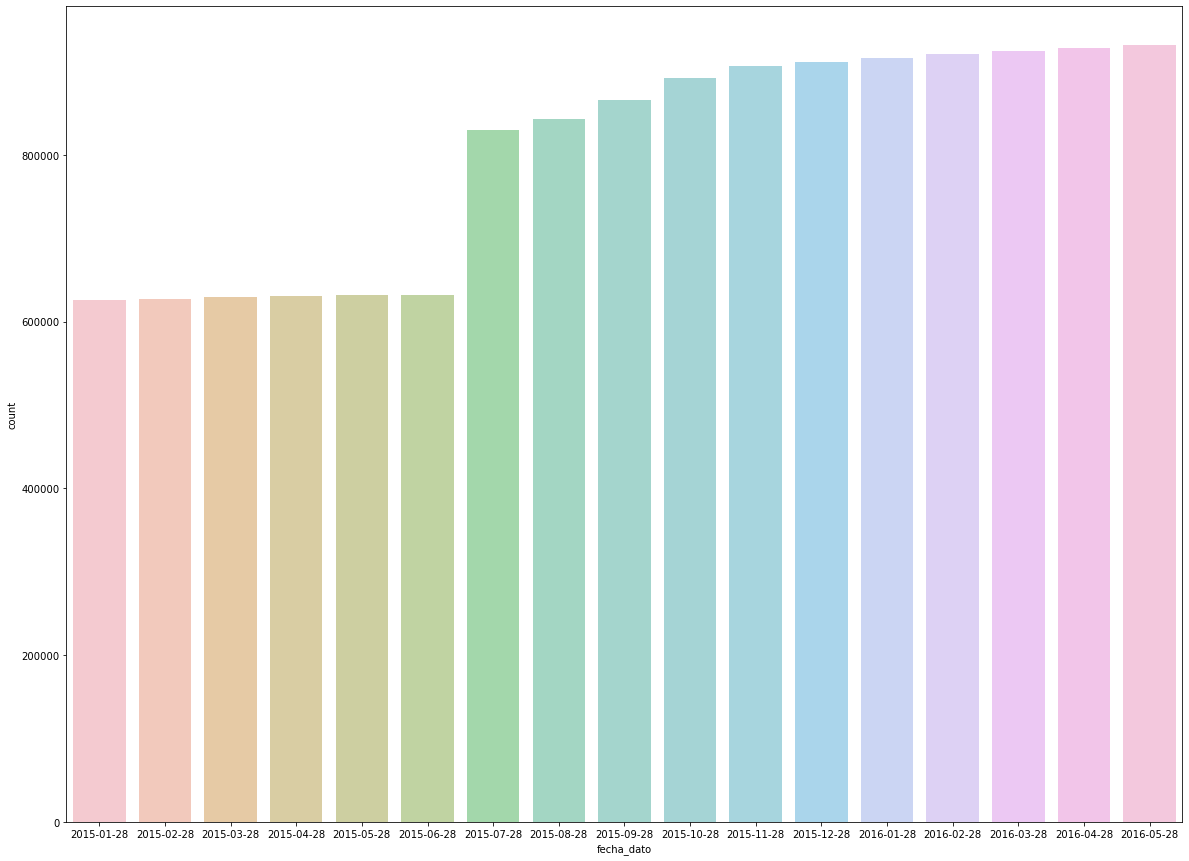

--------------------------------------------------
col :  ind_empleado


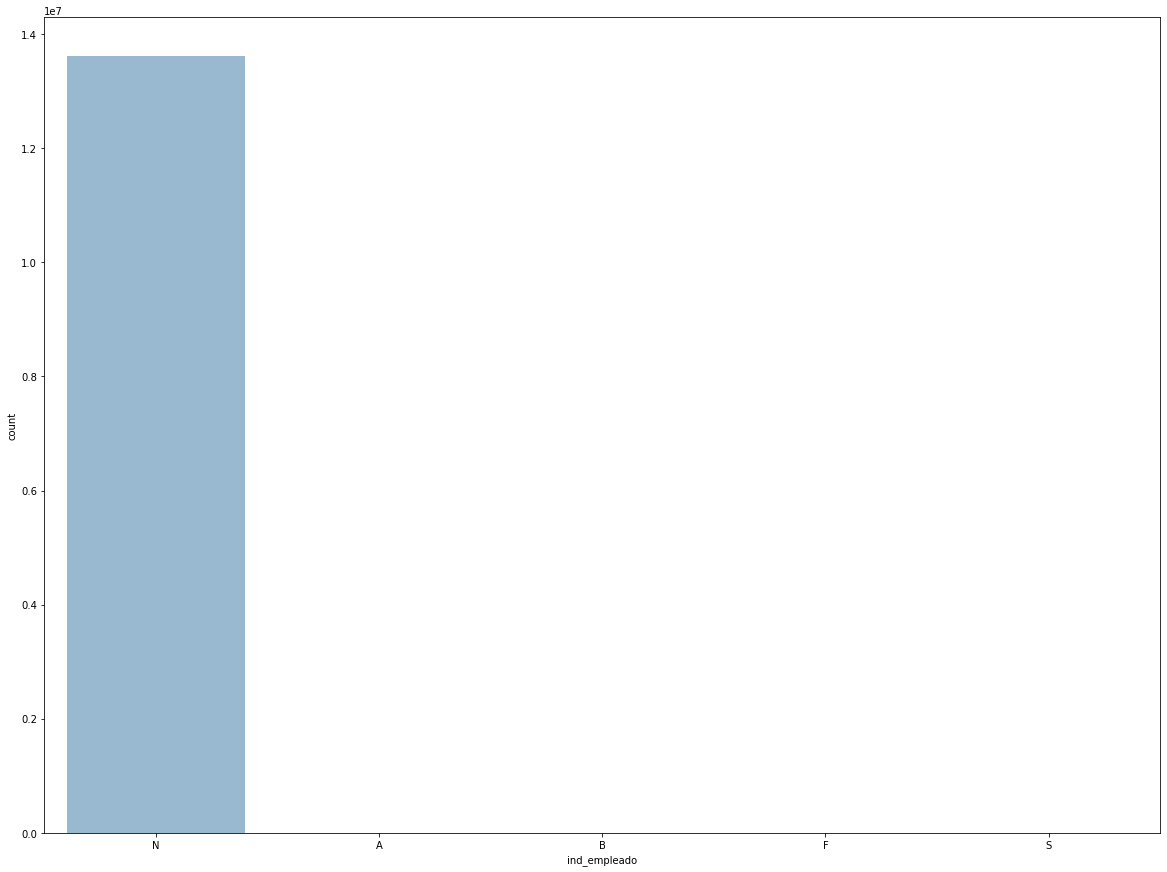

--------------------------------------------------
col :  pais_residencia


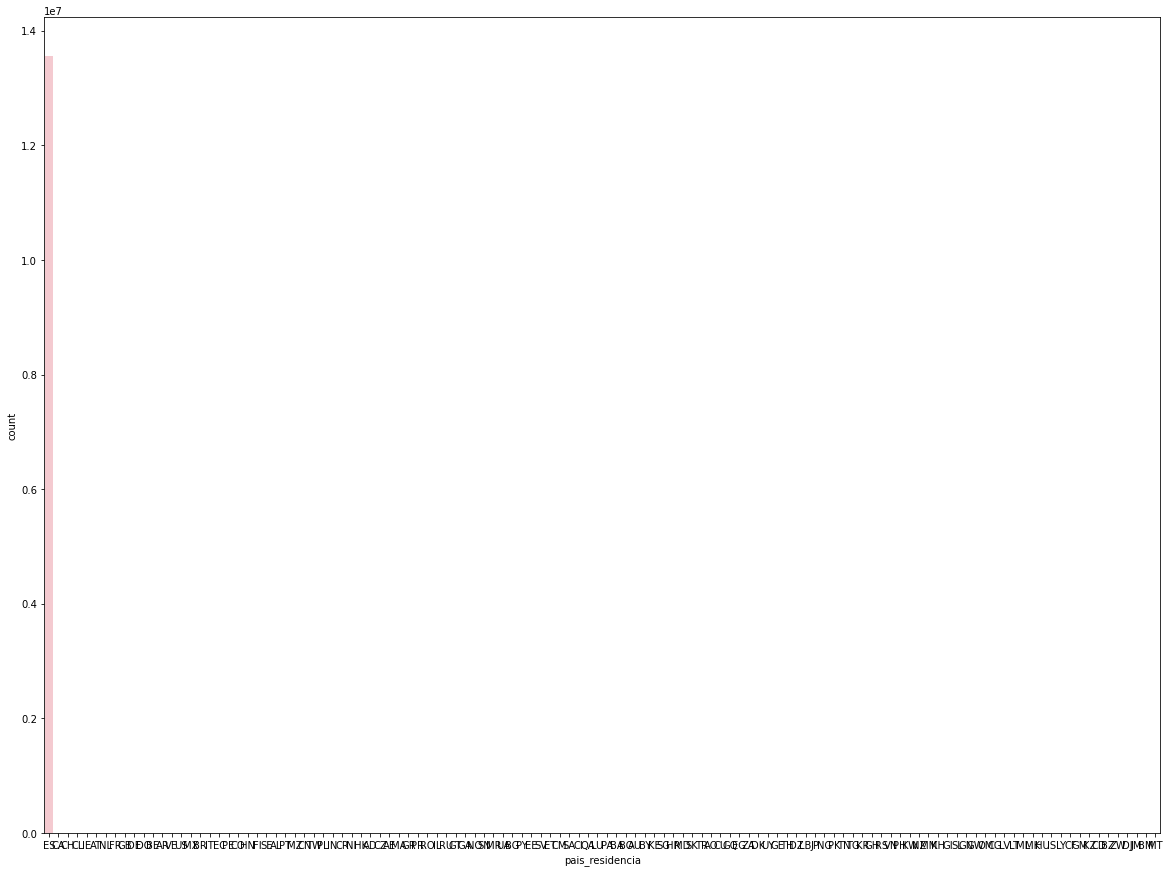

--------------------------------------------------
col :  sexo


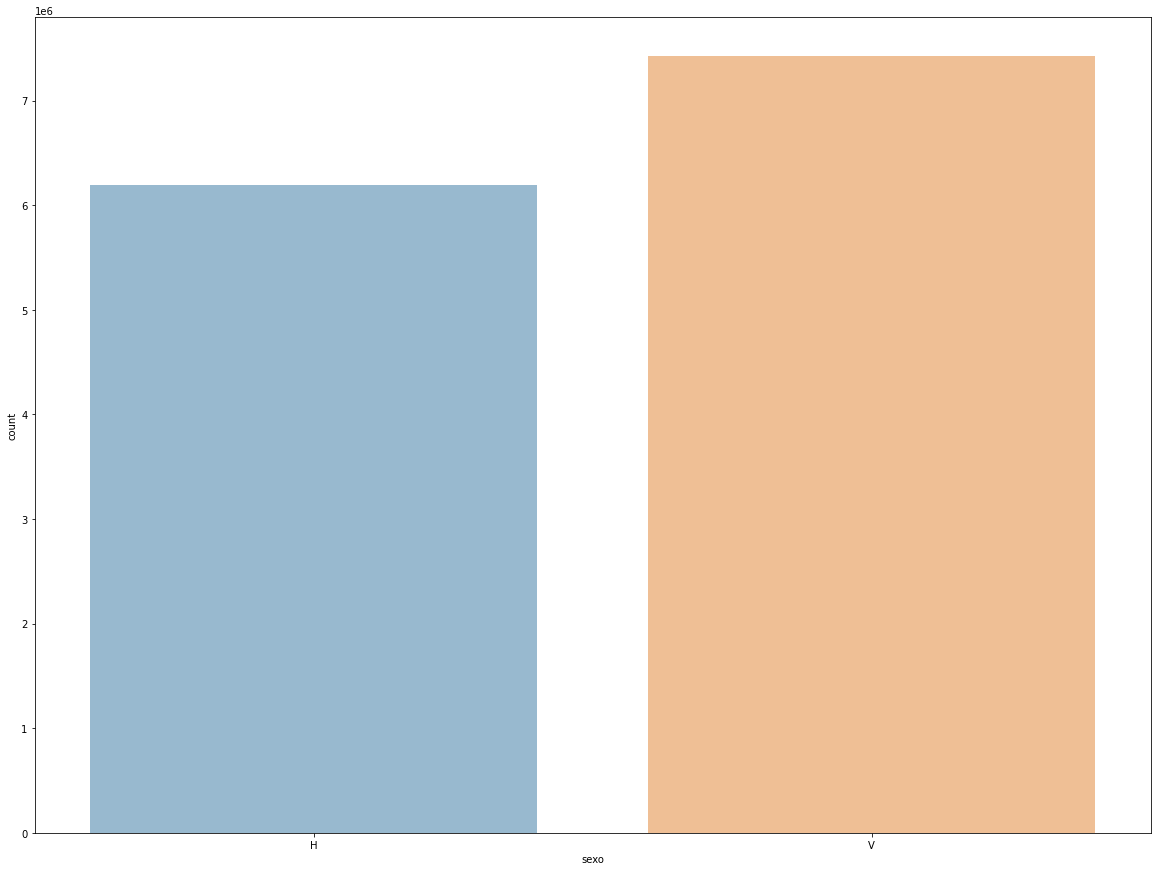

--------------------------------------------------
col :  age


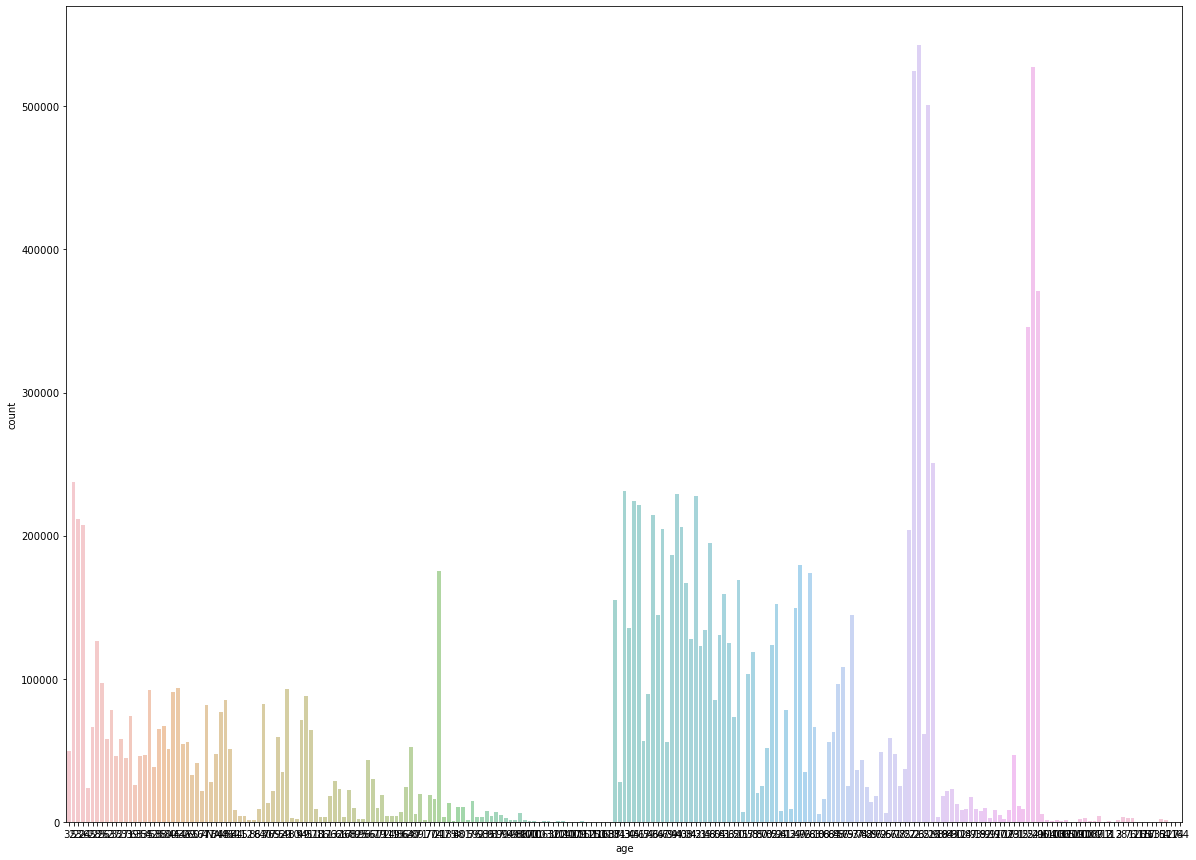

--------------------------------------------------
col :  fecha_alta


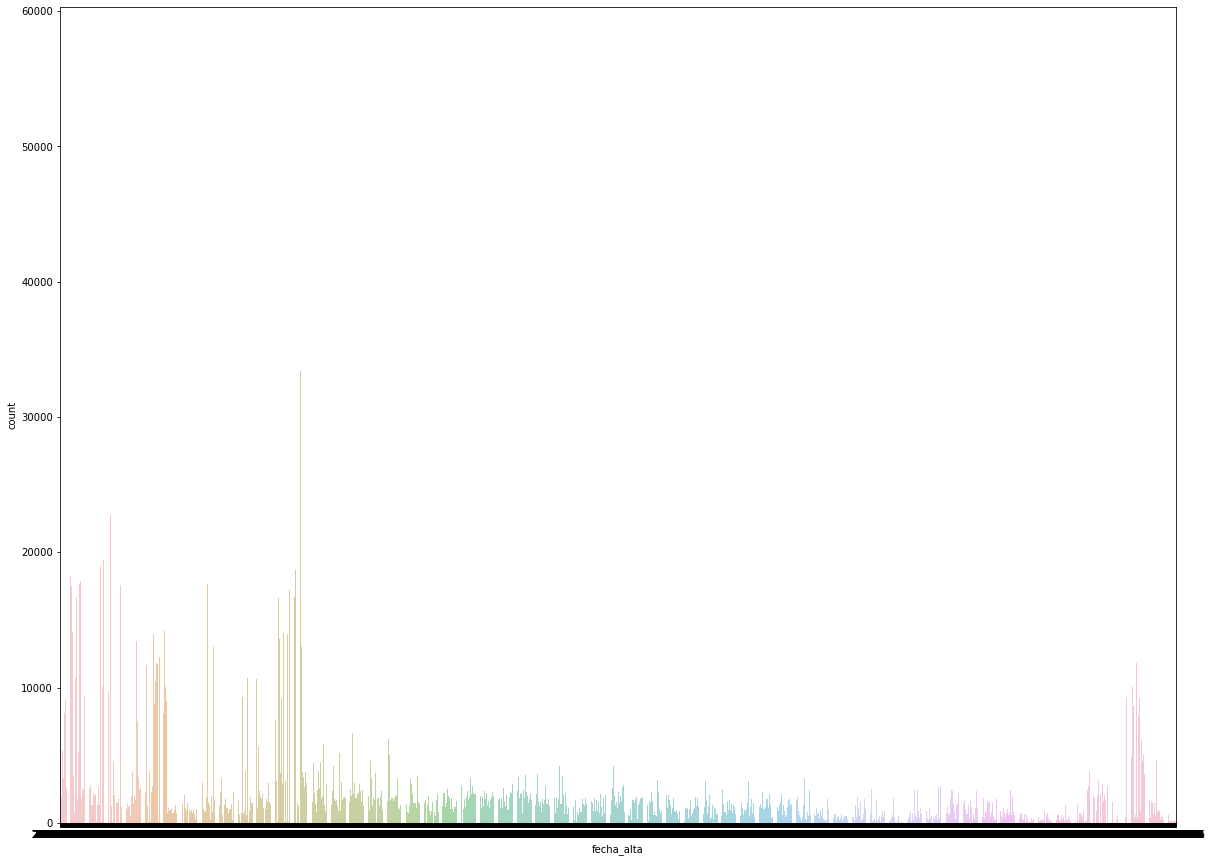

--------------------------------------------------
col :  ind_nuevo


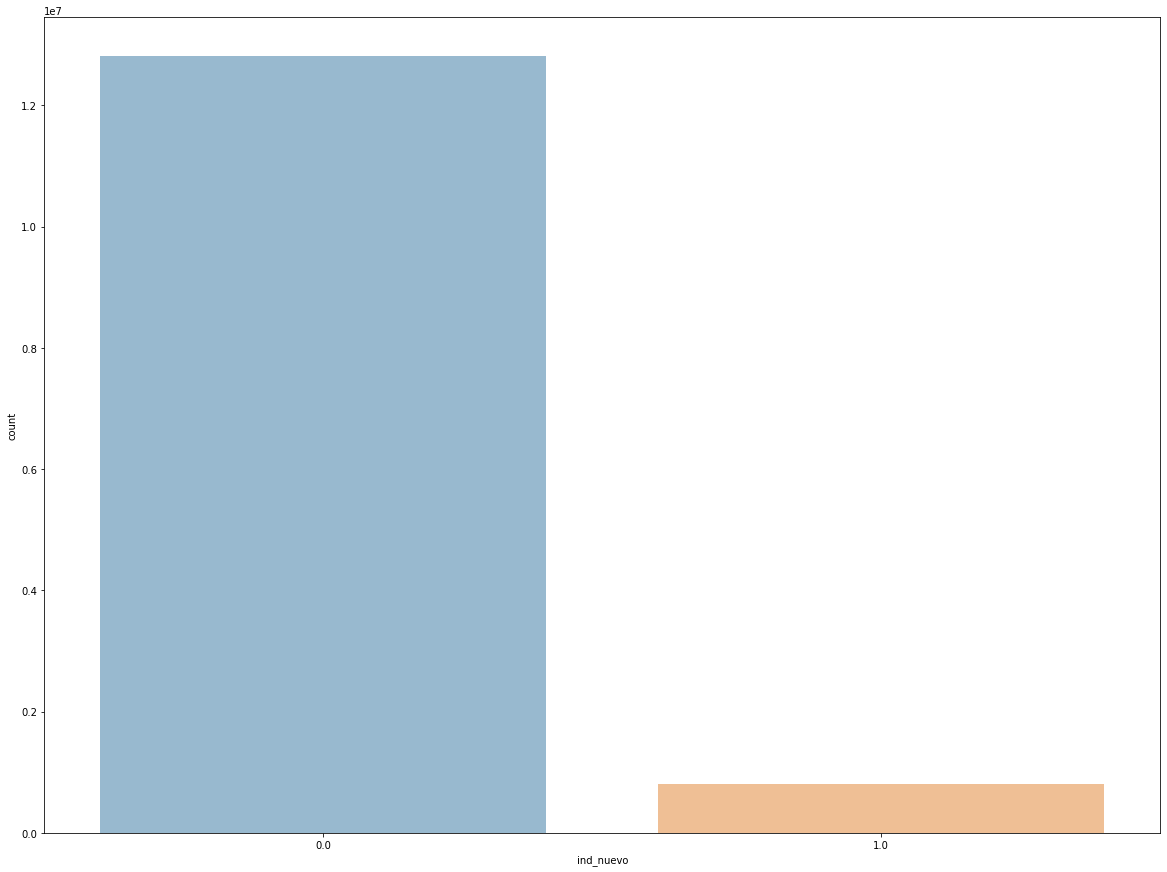

--------------------------------------------------
col :  antiguedad


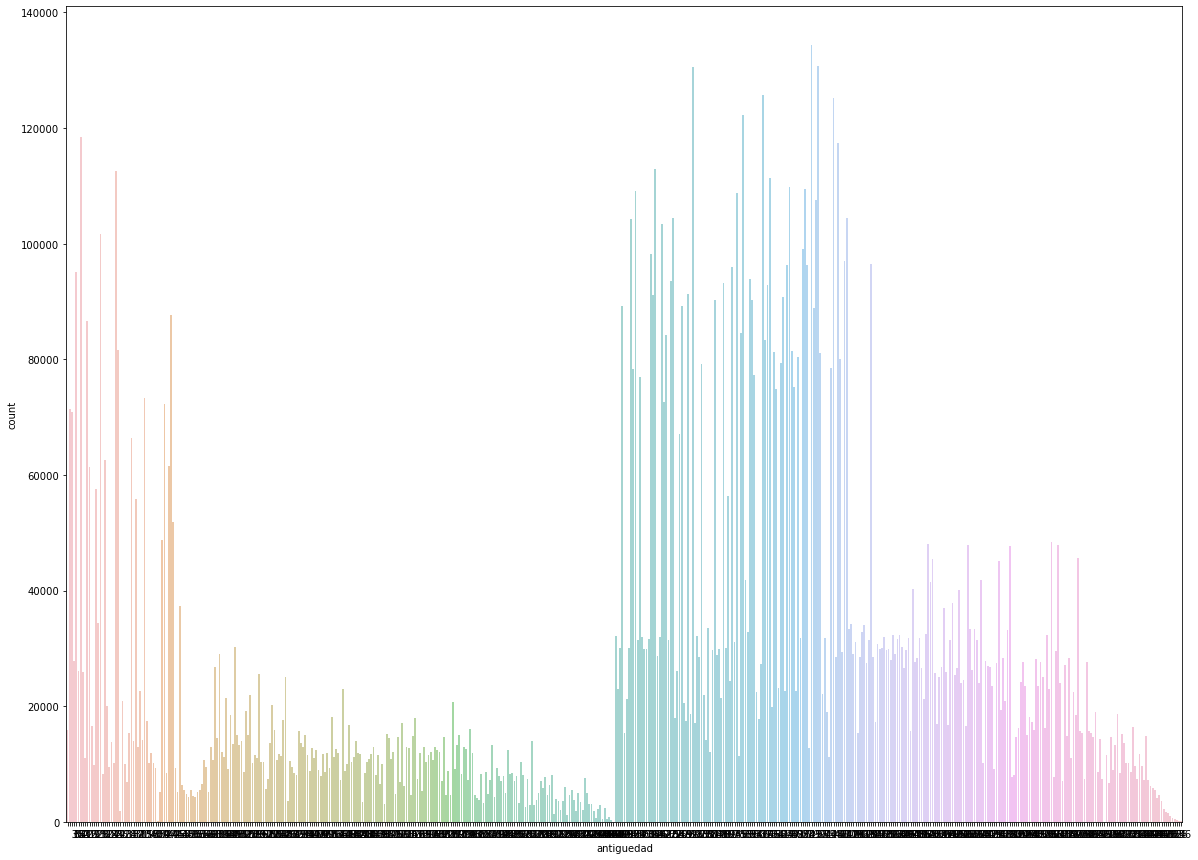

--------------------------------------------------
col :  indrel


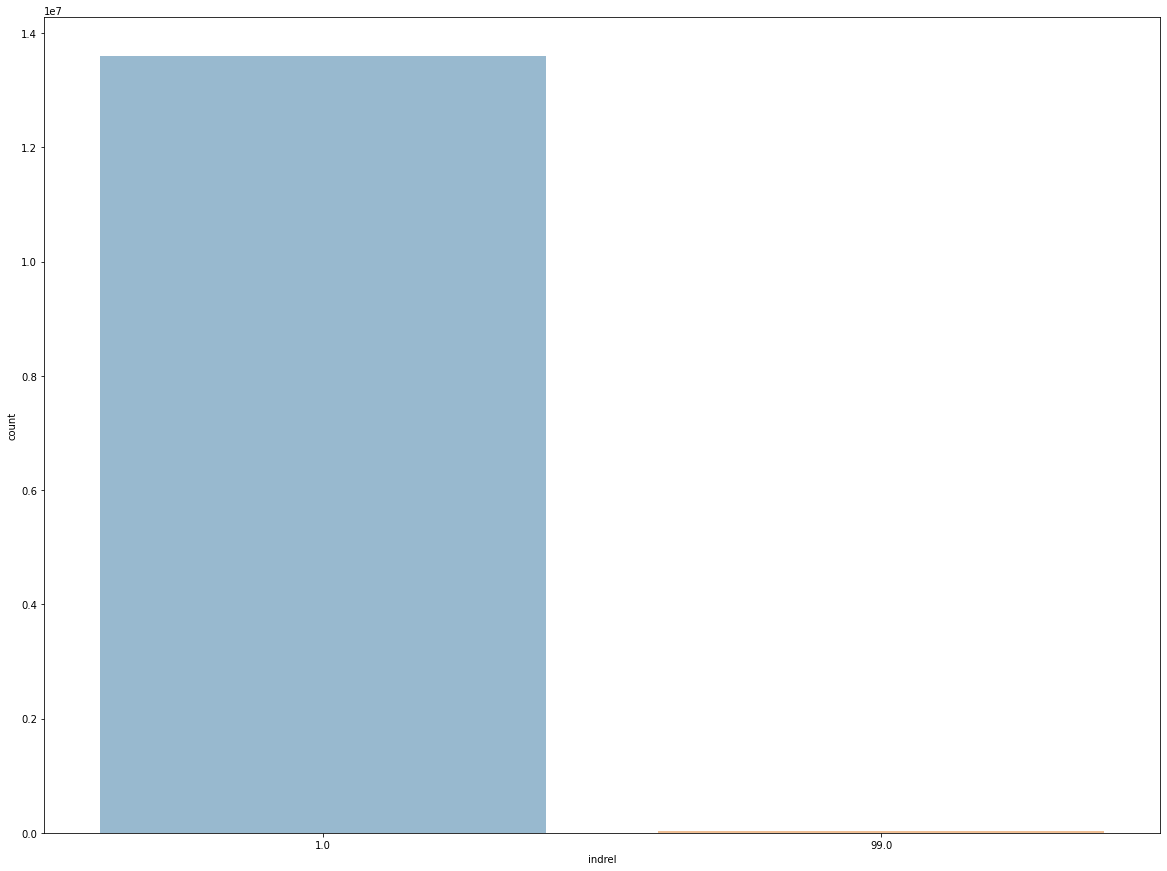

--------------------------------------------------
col :  ult_fec_cli_1t


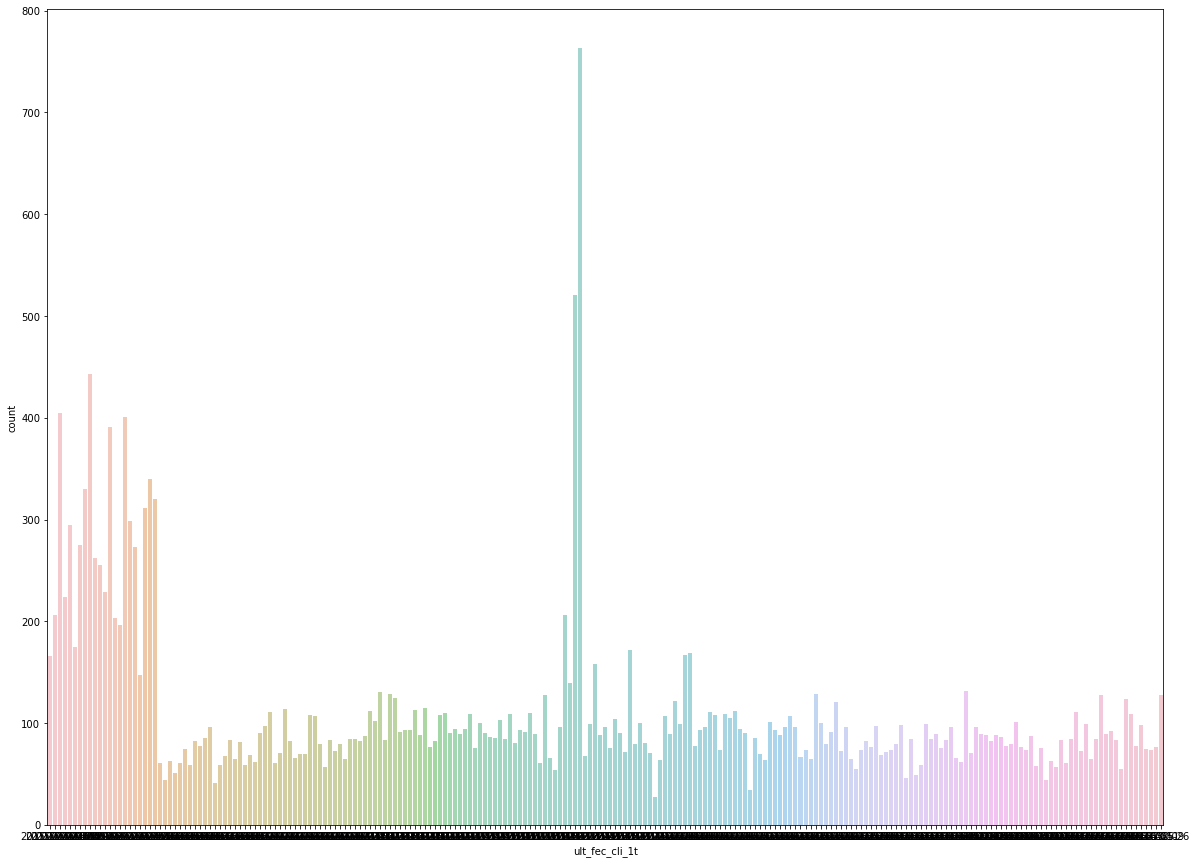

--------------------------------------------------
col :  indrel_1mes


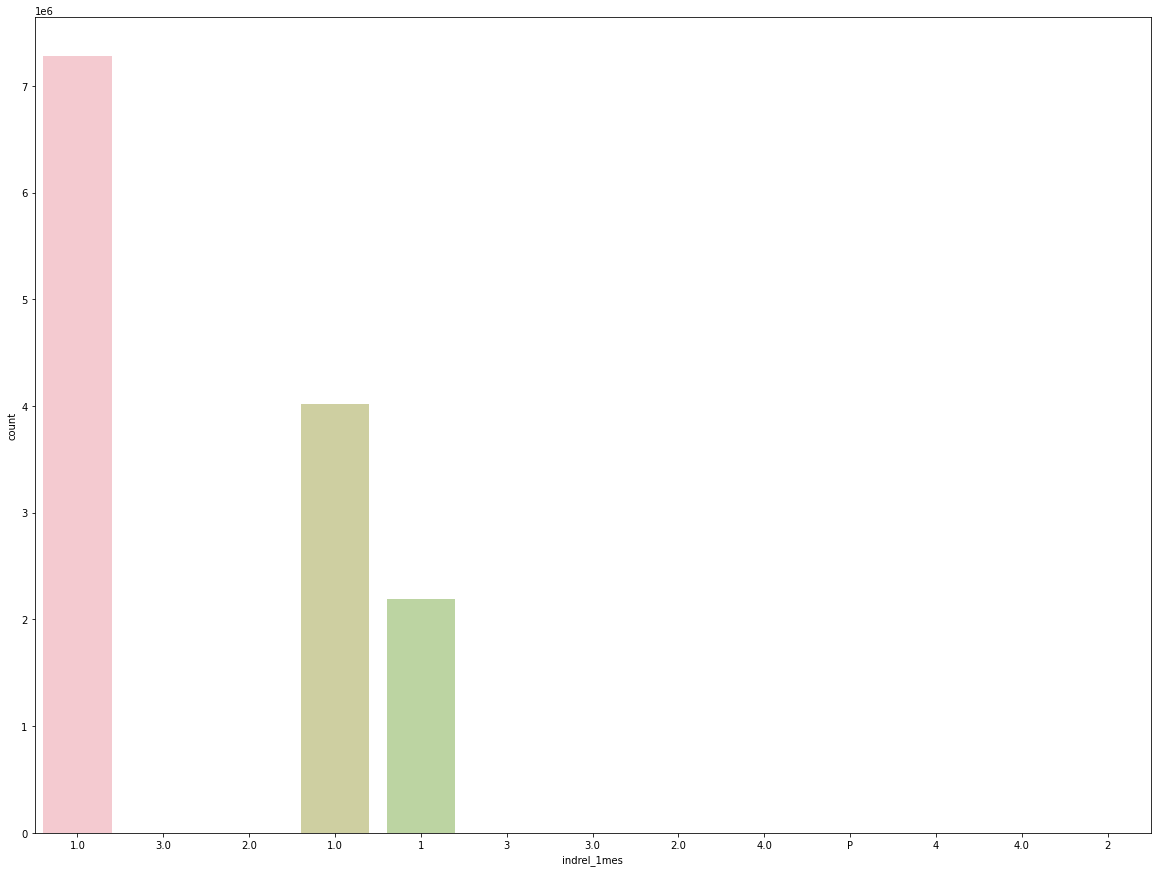

--------------------------------------------------
col :  tiprel_1mes


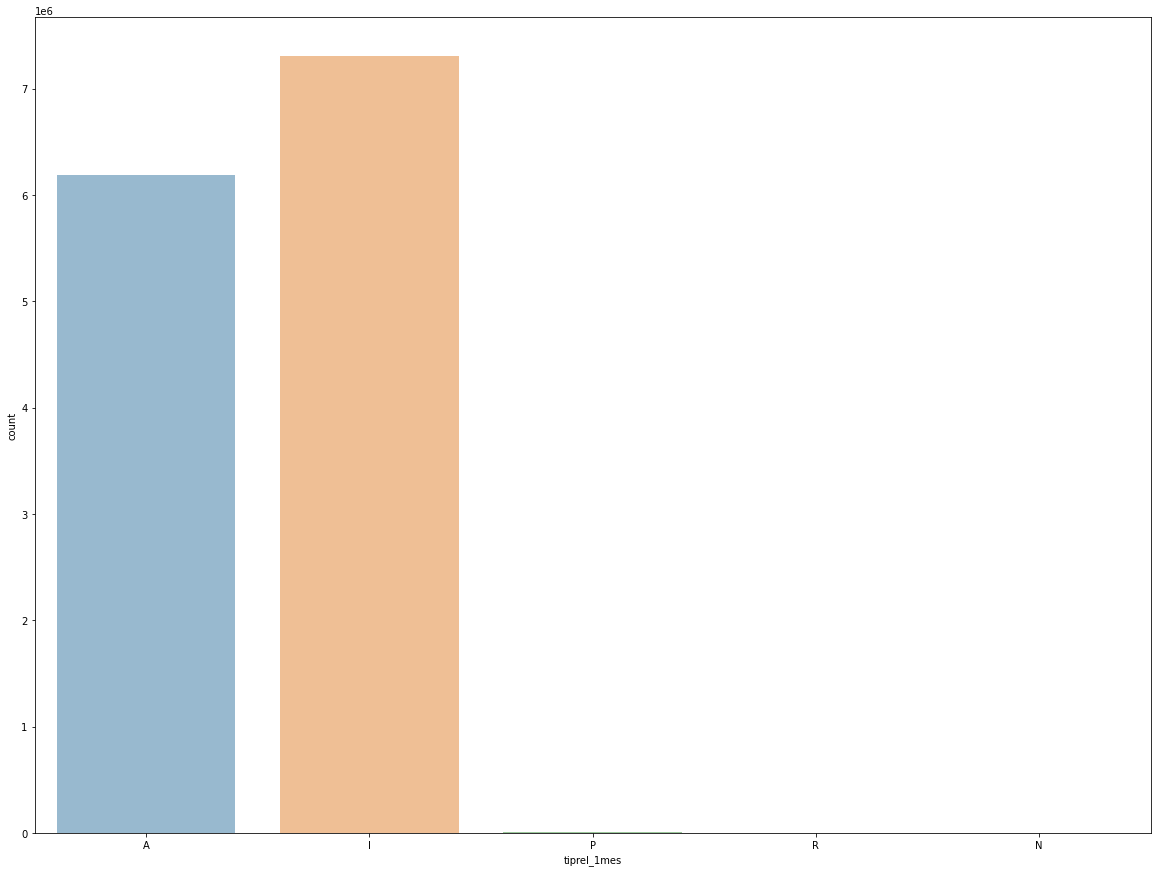

--------------------------------------------------
col :  indresi


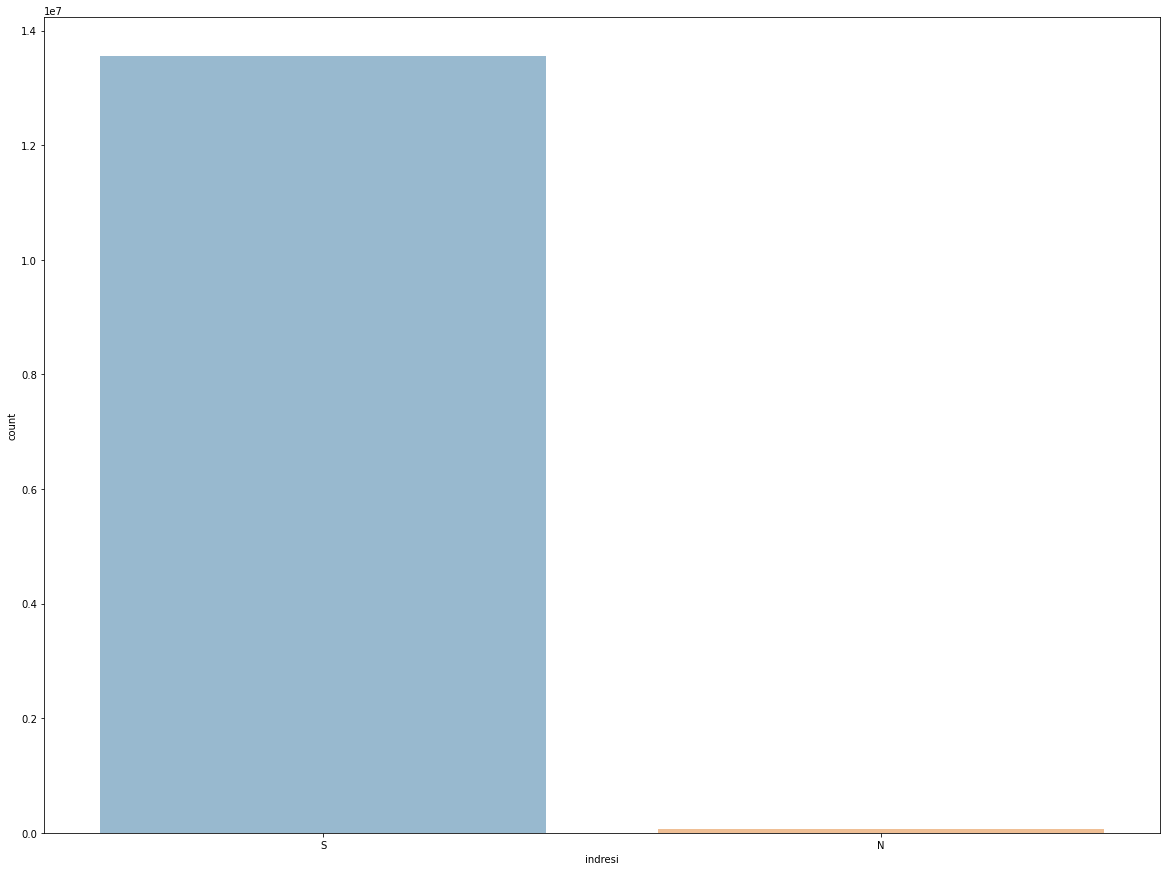

--------------------------------------------------
col :  indext


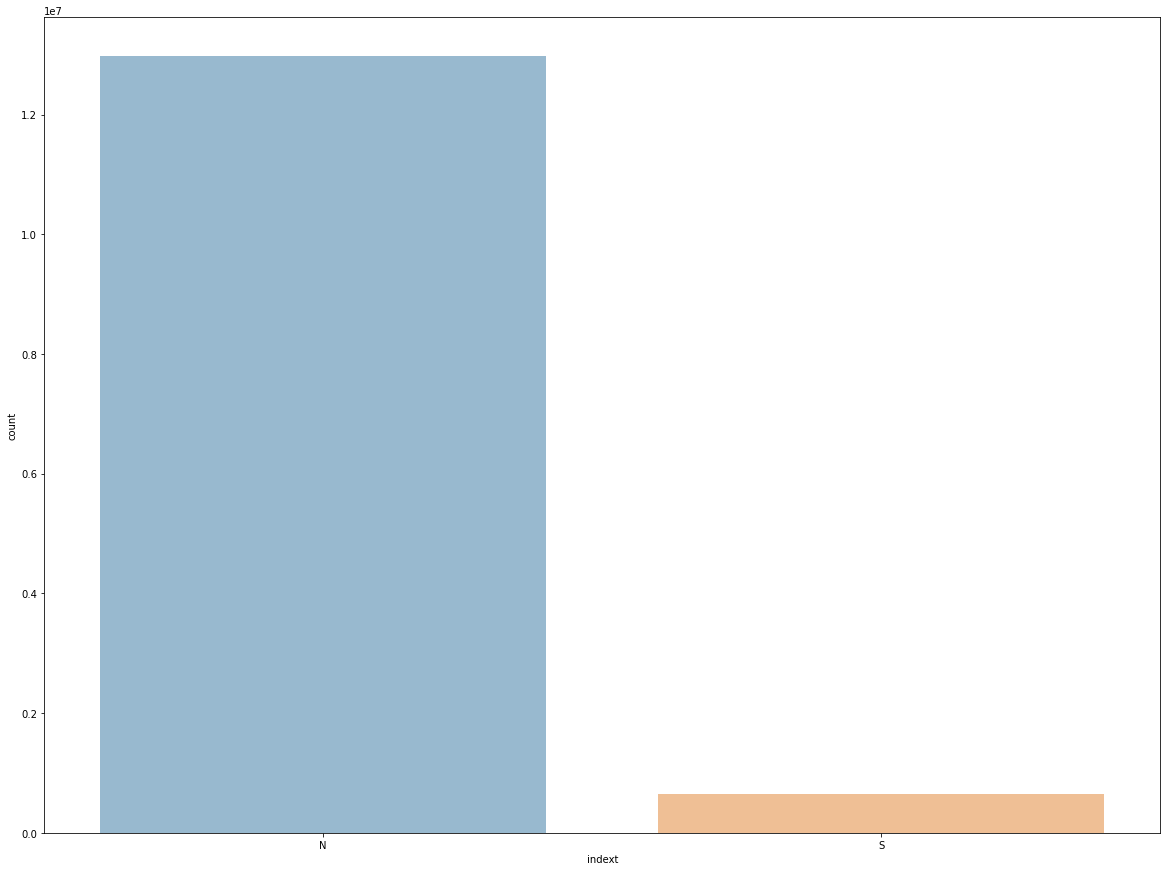

--------------------------------------------------
col :  conyuemp


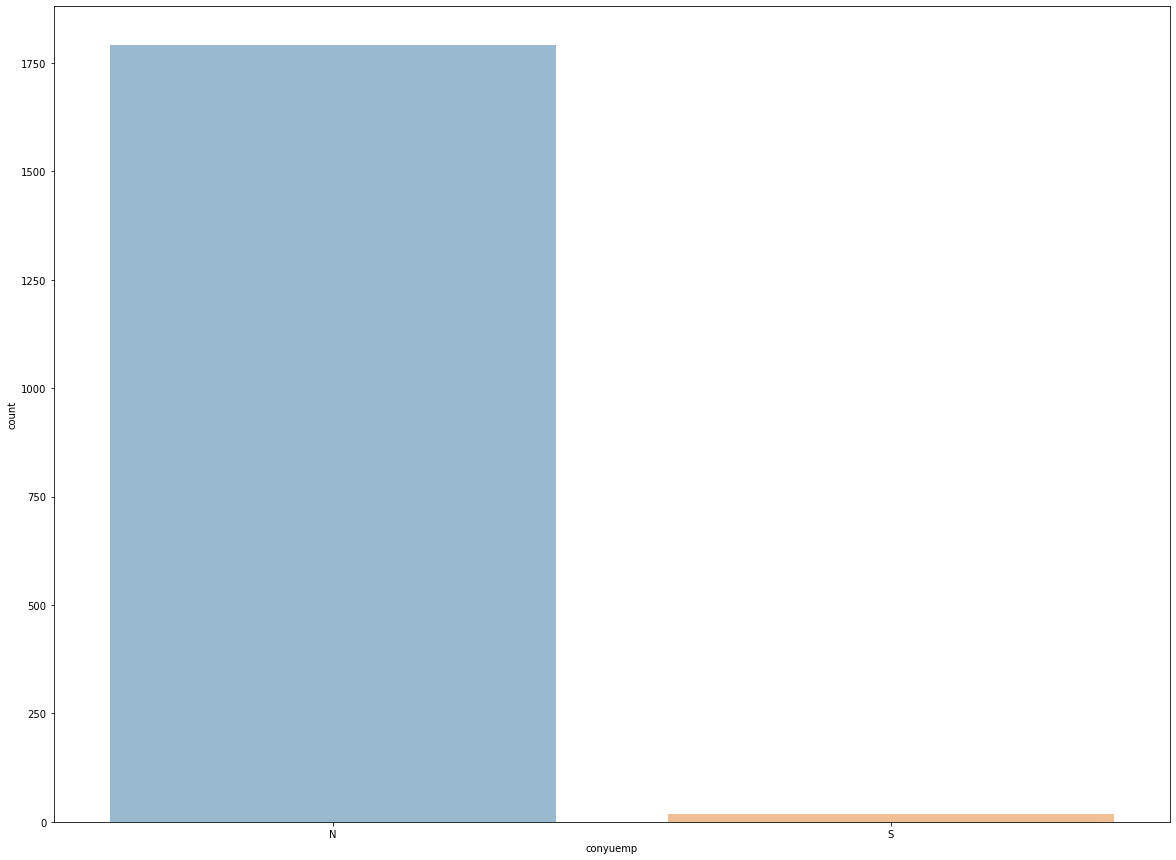

--------------------------------------------------
col :  canal_entrada


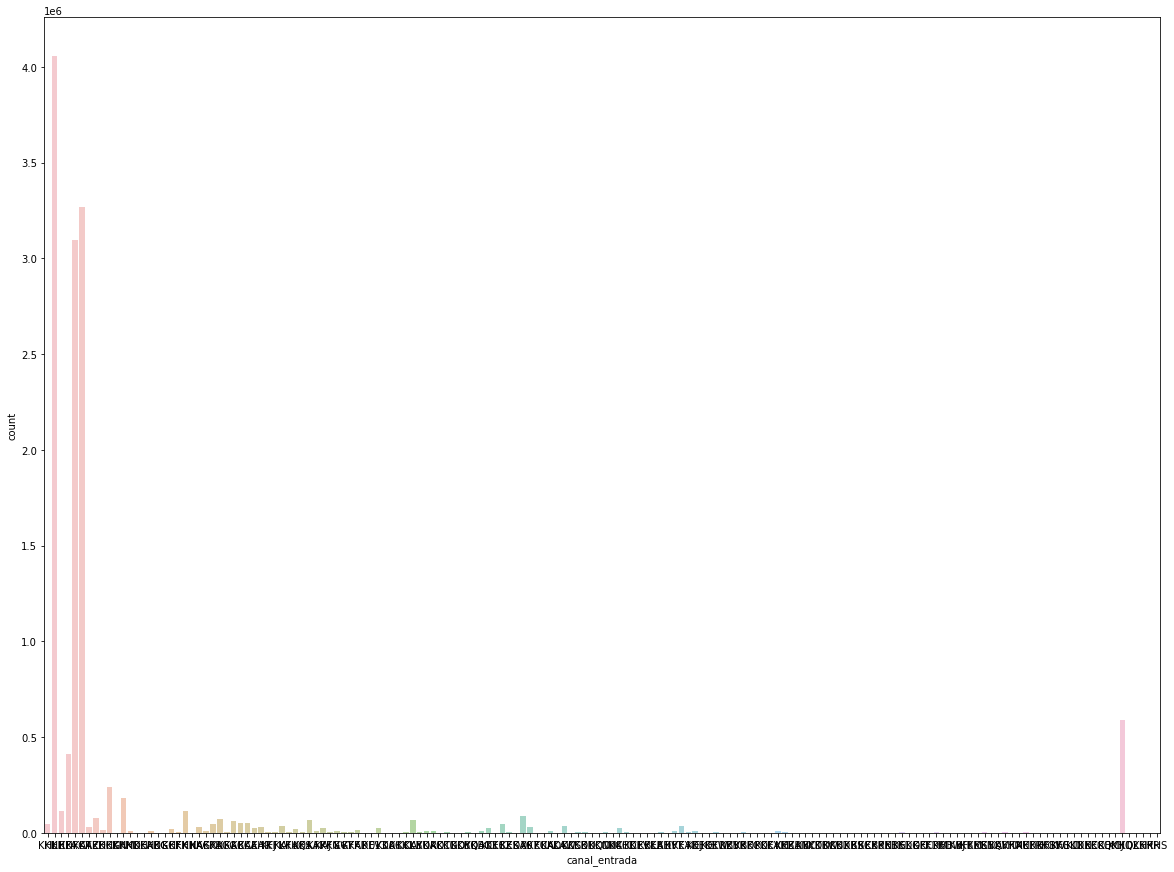

--------------------------------------------------
col :  indfall


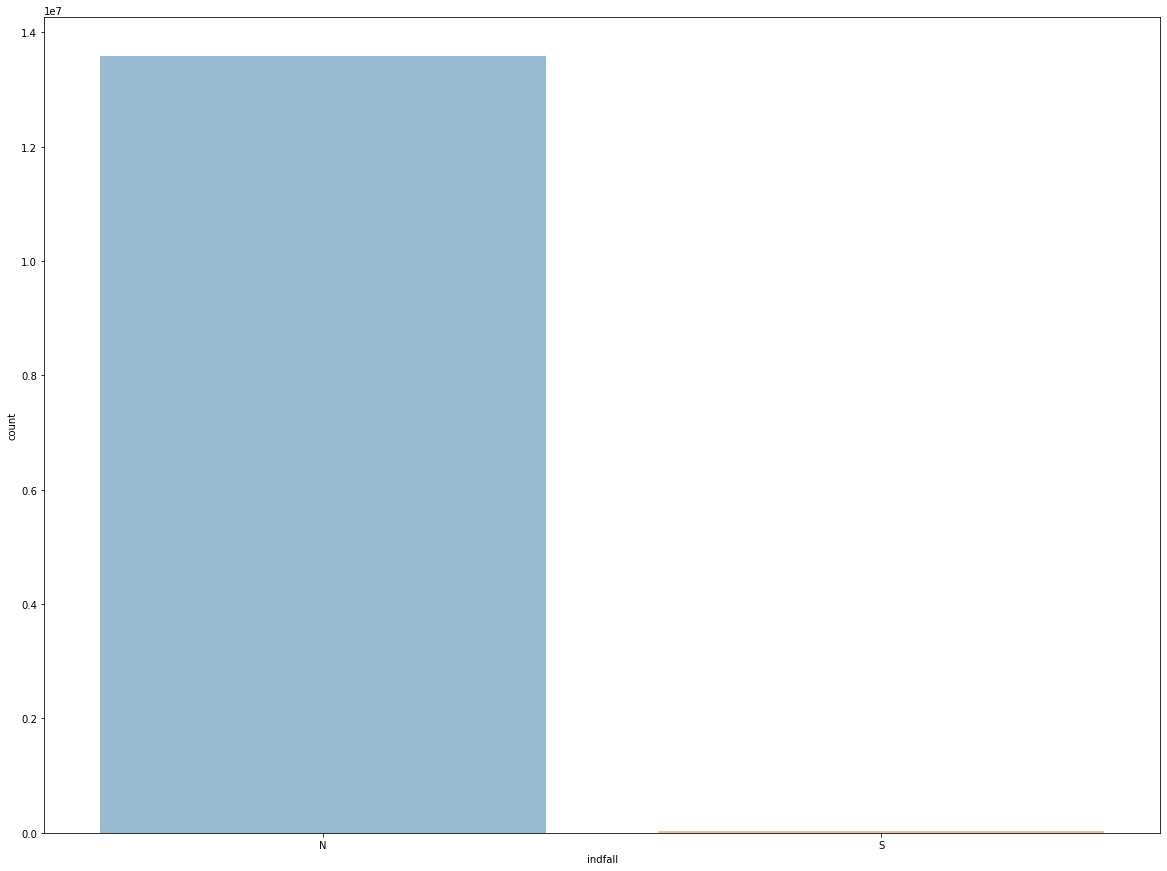

--------------------------------------------------
col :  tipodom


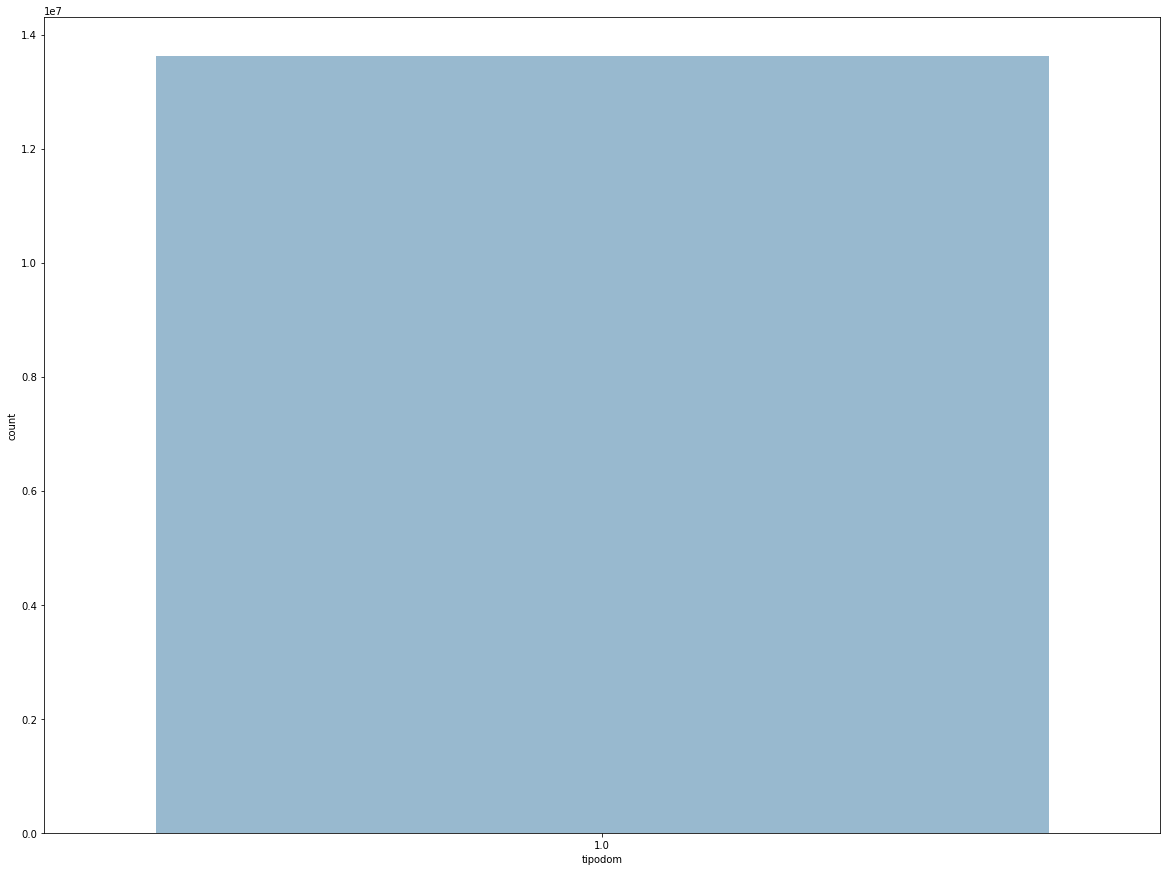

--------------------------------------------------
col :  cod_prov


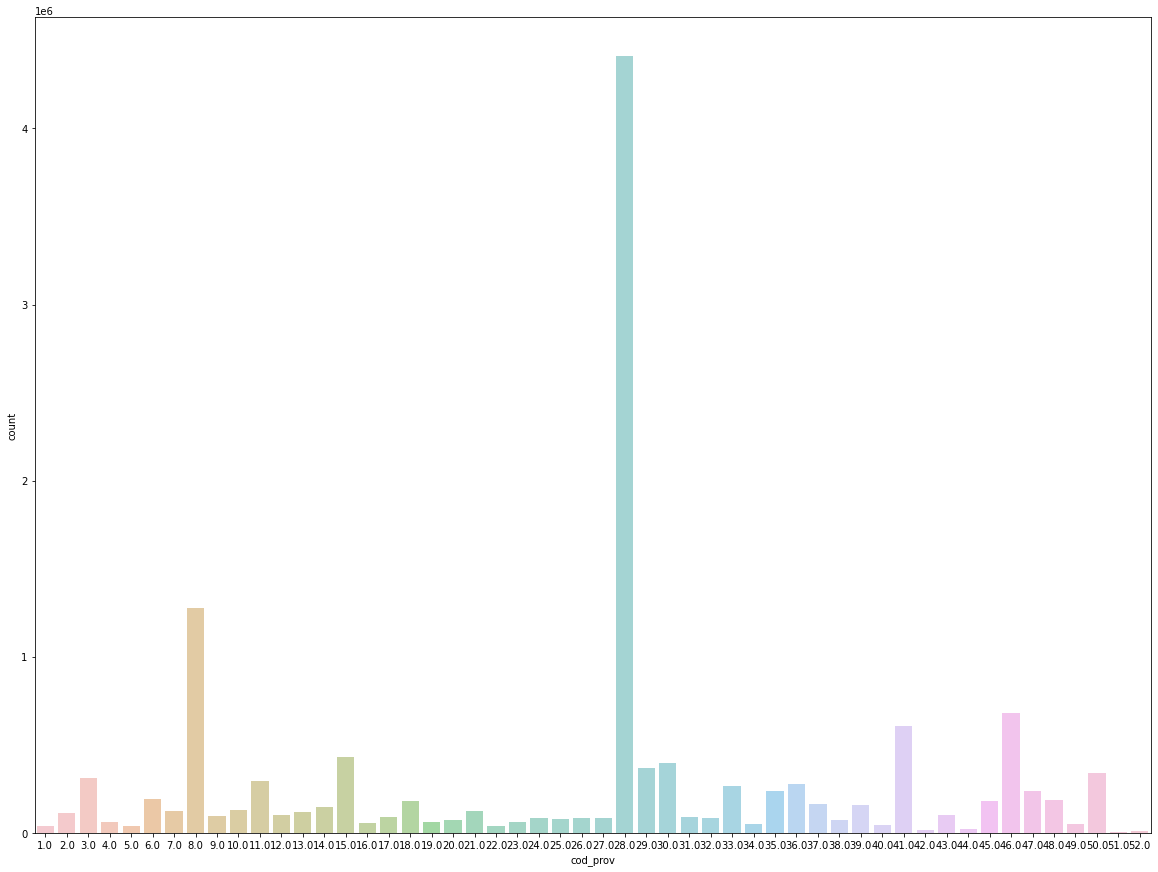

--------------------------------------------------
col :  nomprov


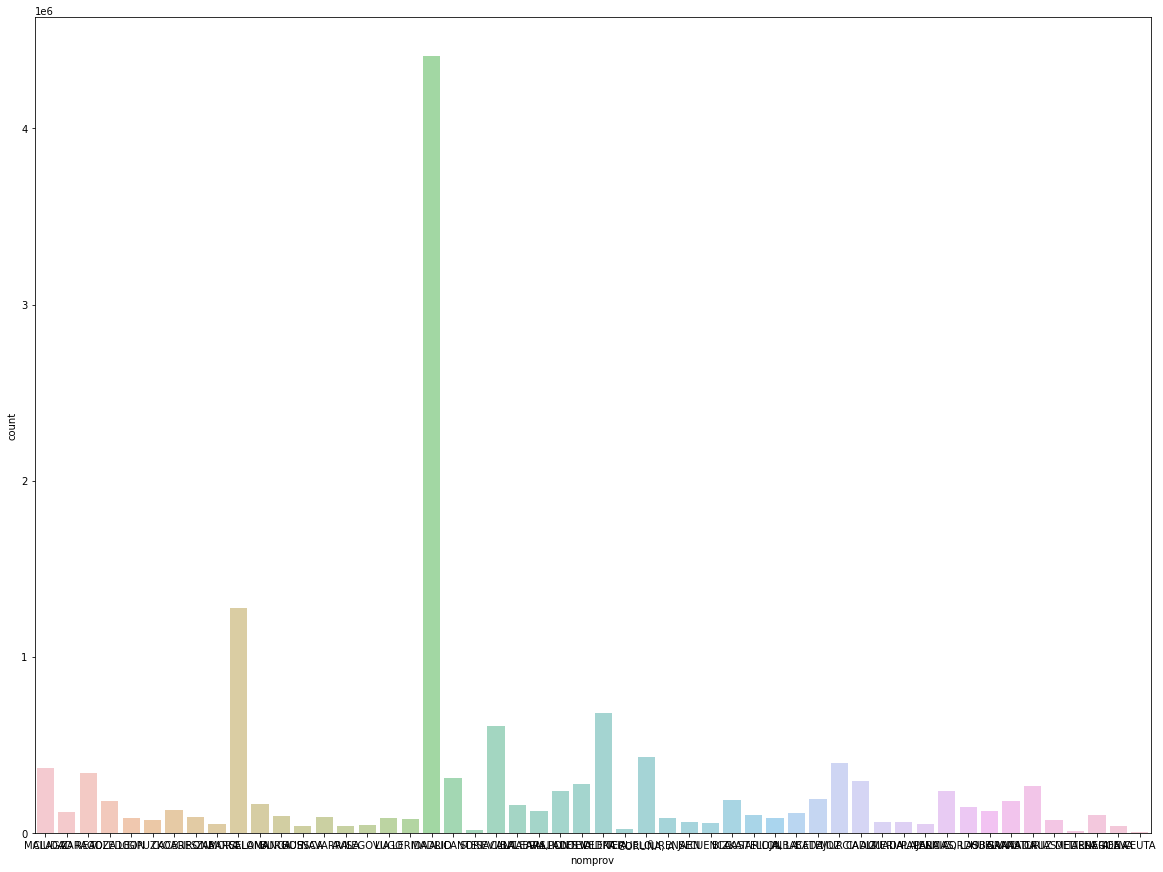

--------------------------------------------------
col :  ind_actividad_cliente


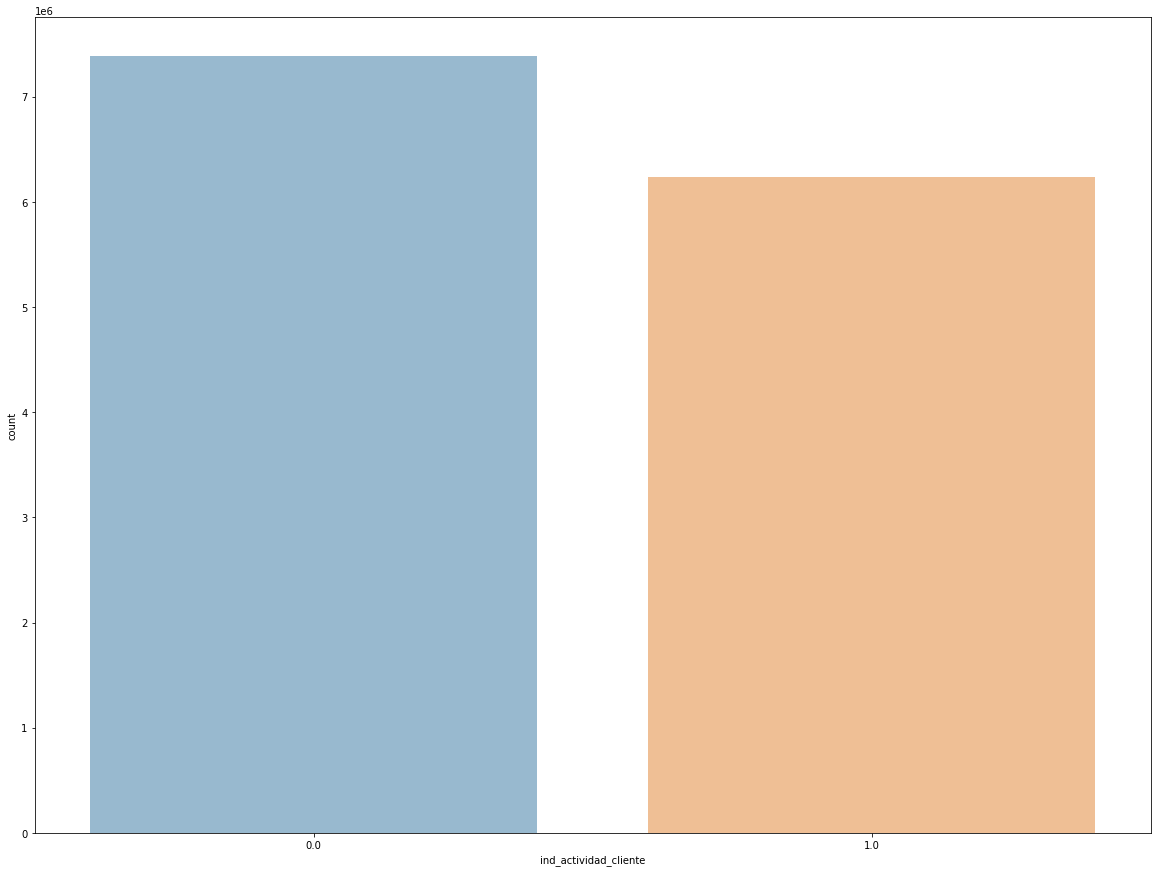

--------------------------------------------------
col :  segmento


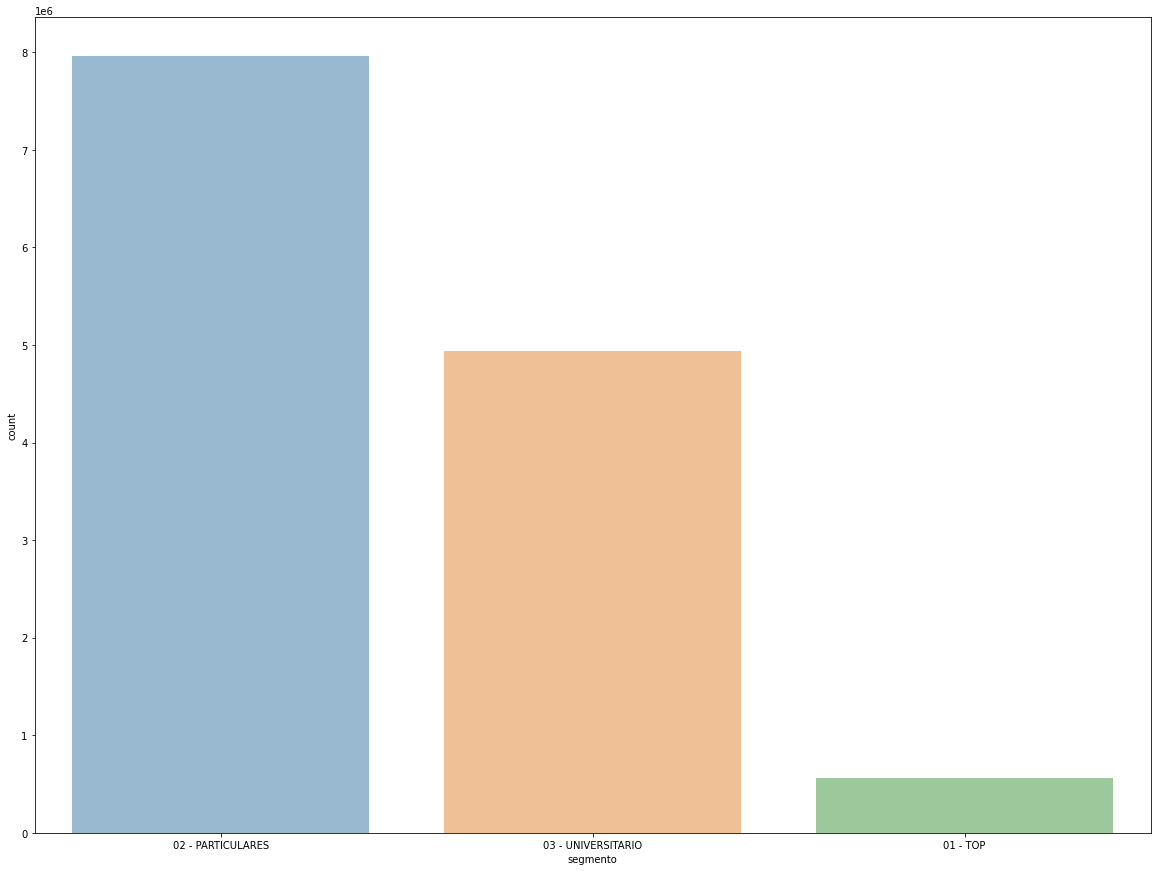

--------------------------------------------------
col :  ind_ahor_fin_ult1


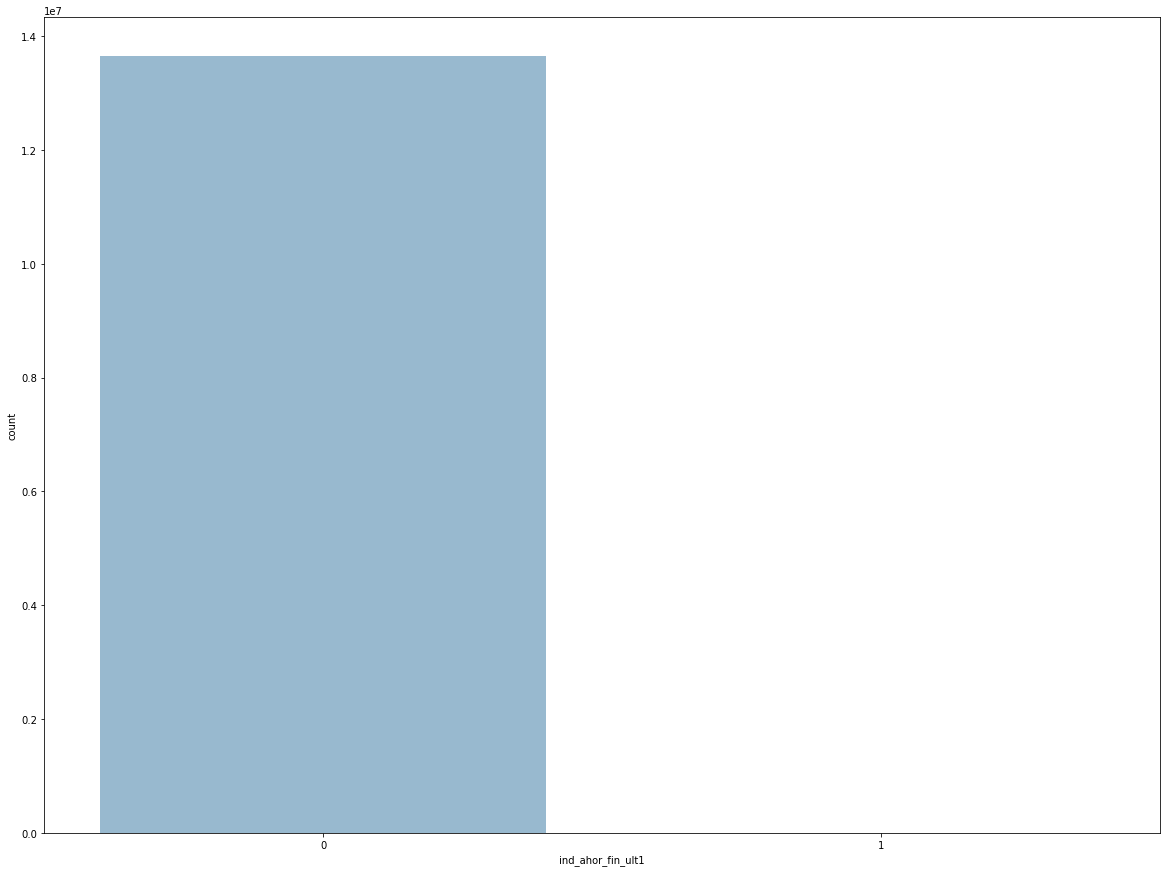

--------------------------------------------------
col :  ind_aval_fin_ult1


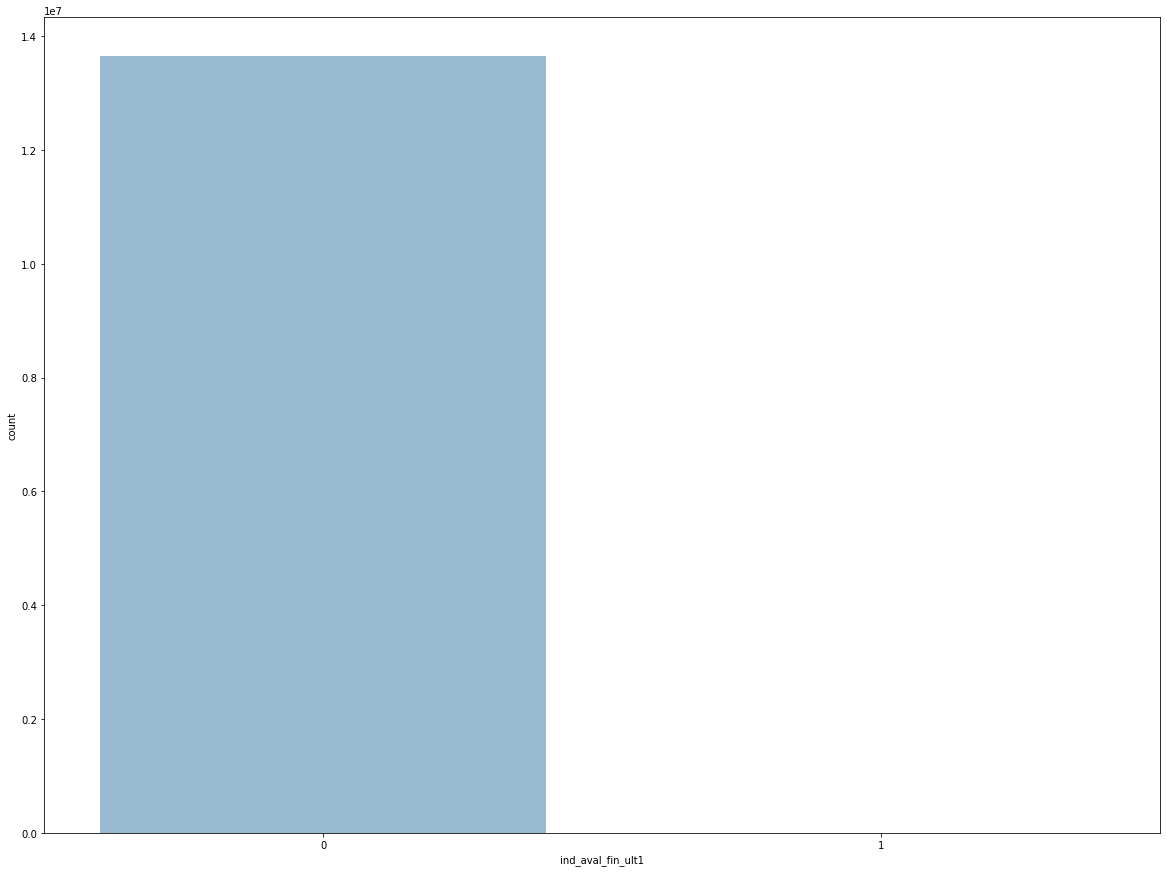

--------------------------------------------------
col :  ind_cco_fin_ult1


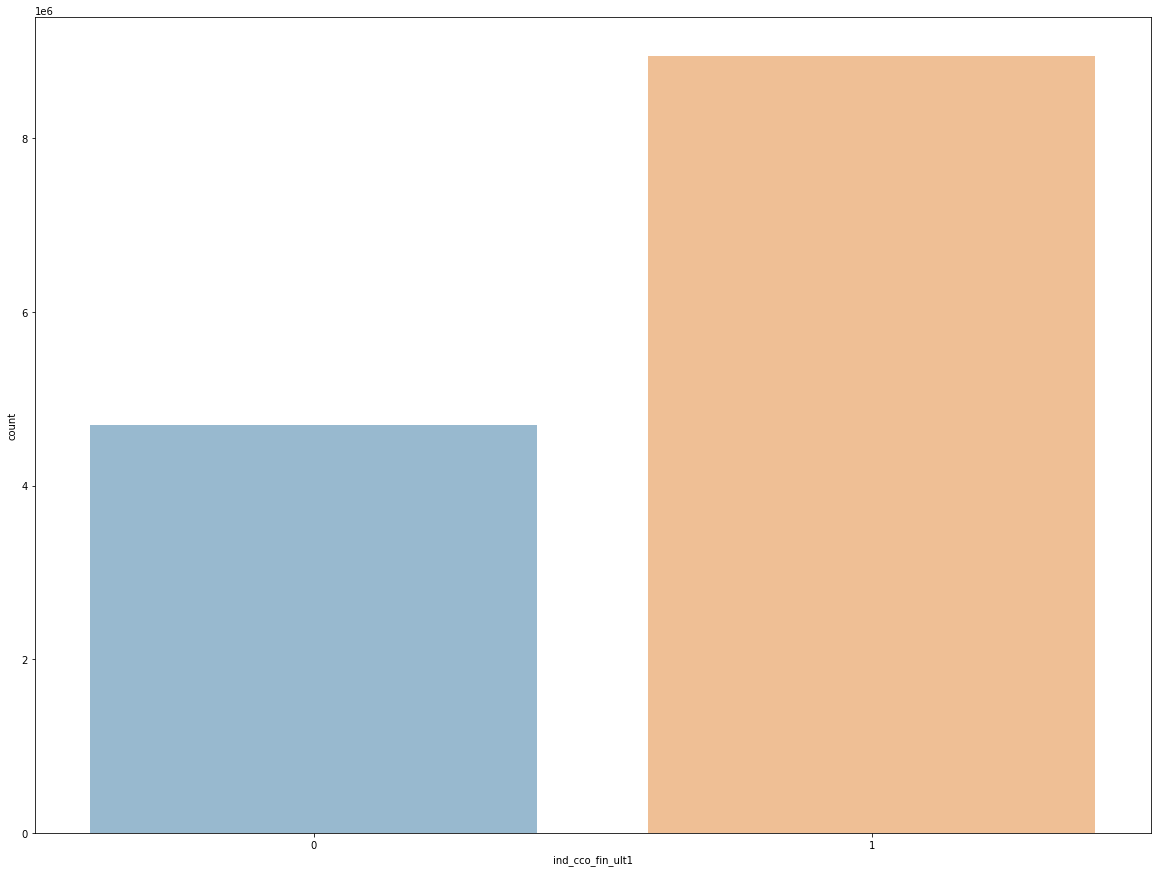

--------------------------------------------------
col :  ind_cder_fin_ult1


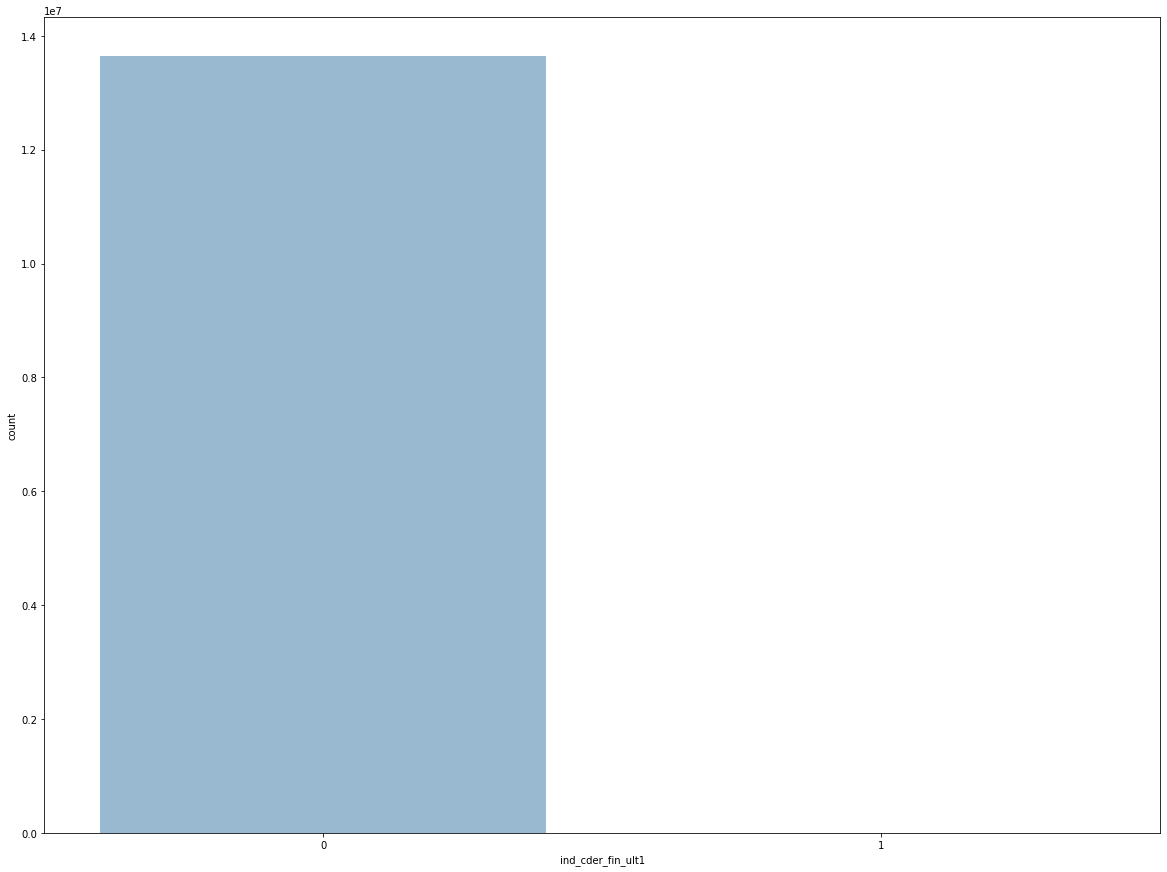

--------------------------------------------------
col :  ind_cno_fin_ult1


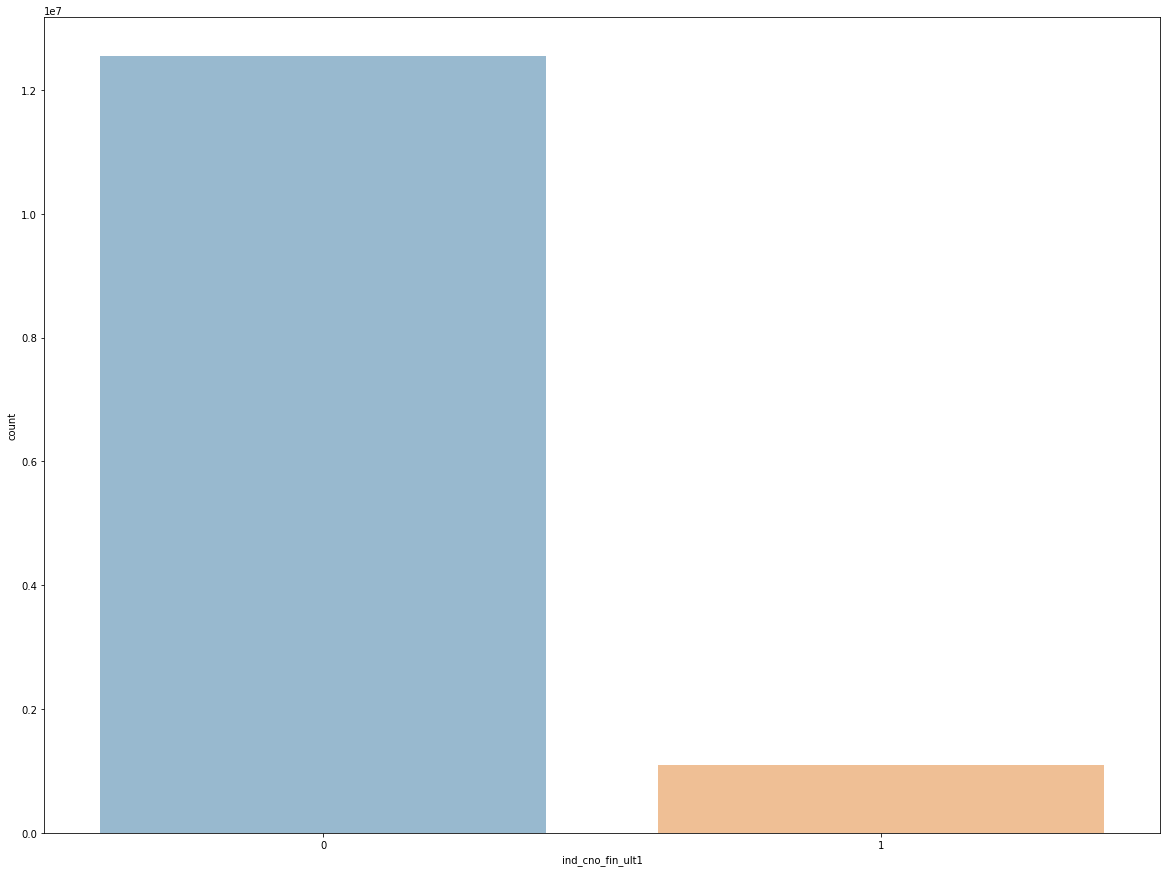

--------------------------------------------------
col :  ind_ctju_fin_ult1


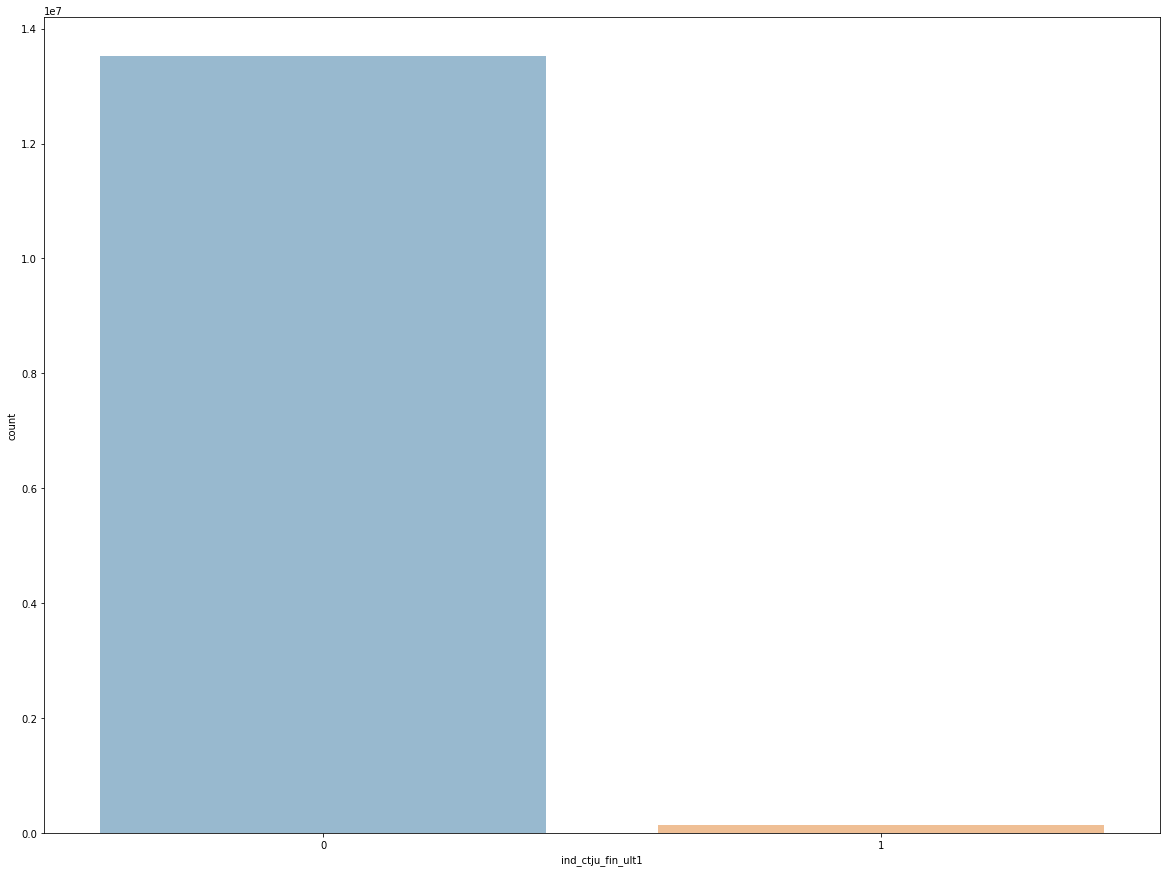

--------------------------------------------------
col :  ind_ctma_fin_ult1


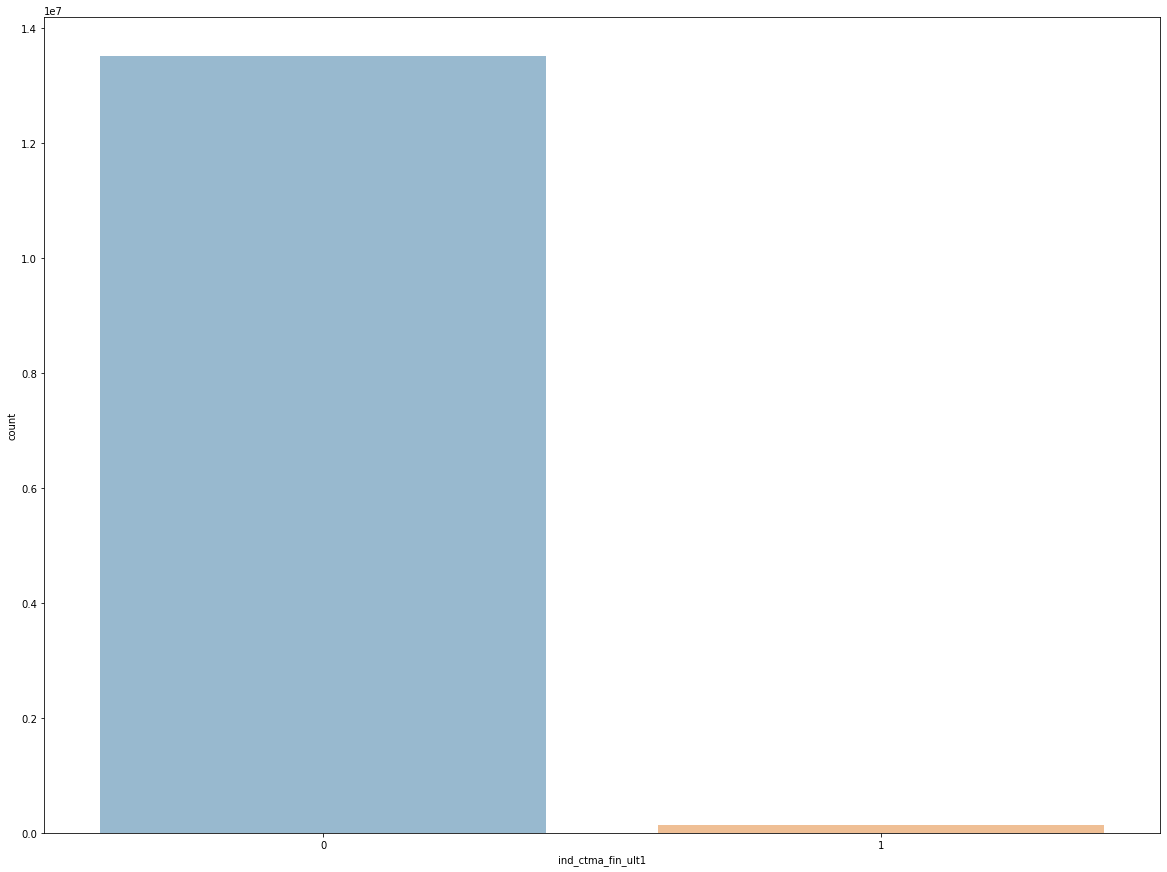

--------------------------------------------------
col :  ind_ctop_fin_ult1


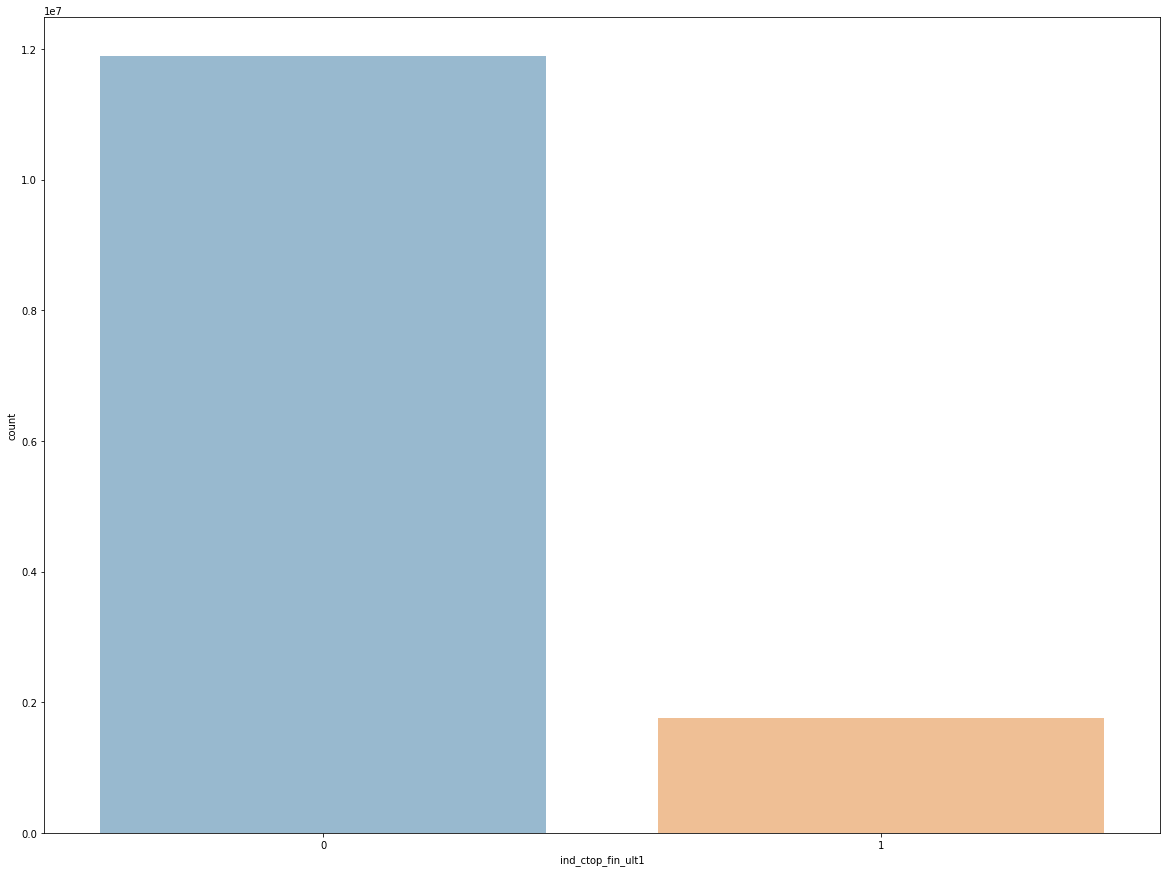

--------------------------------------------------
col :  ind_ctpp_fin_ult1


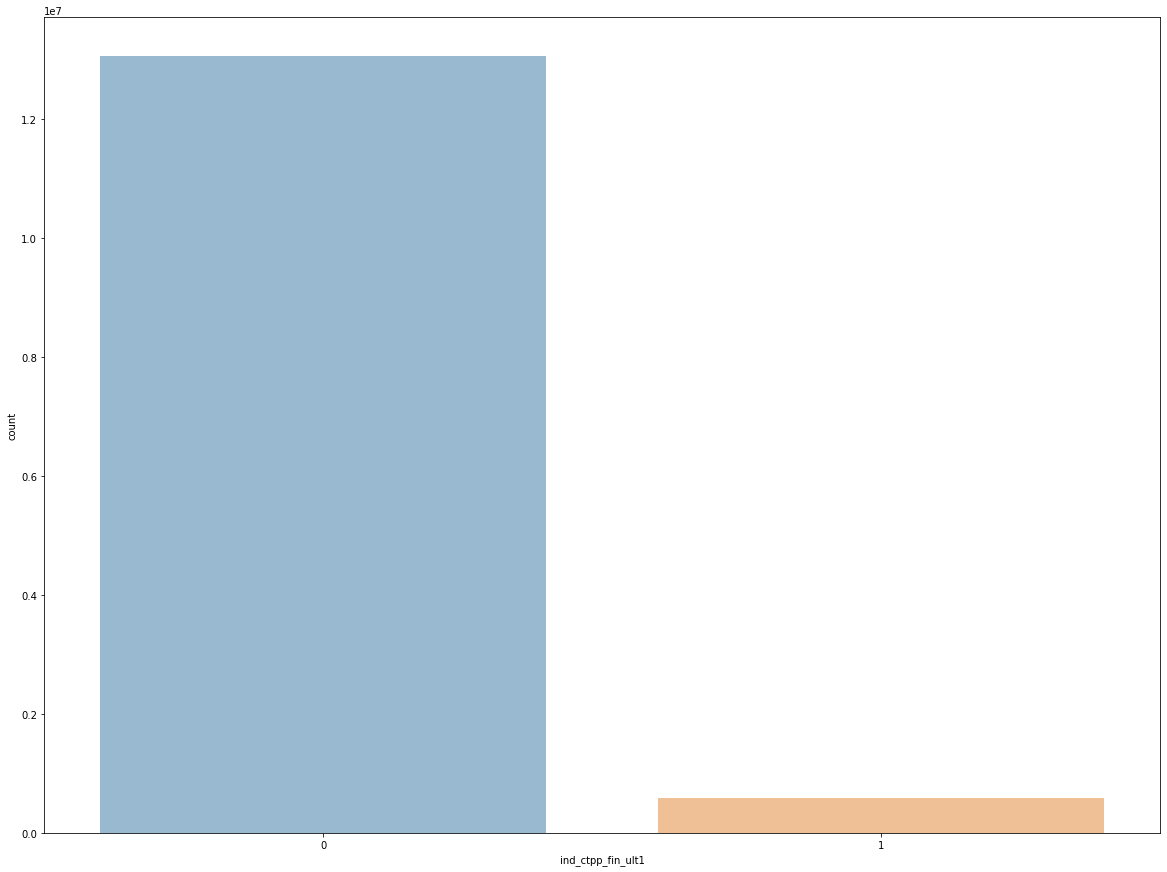

--------------------------------------------------
col :  ind_deco_fin_ult1


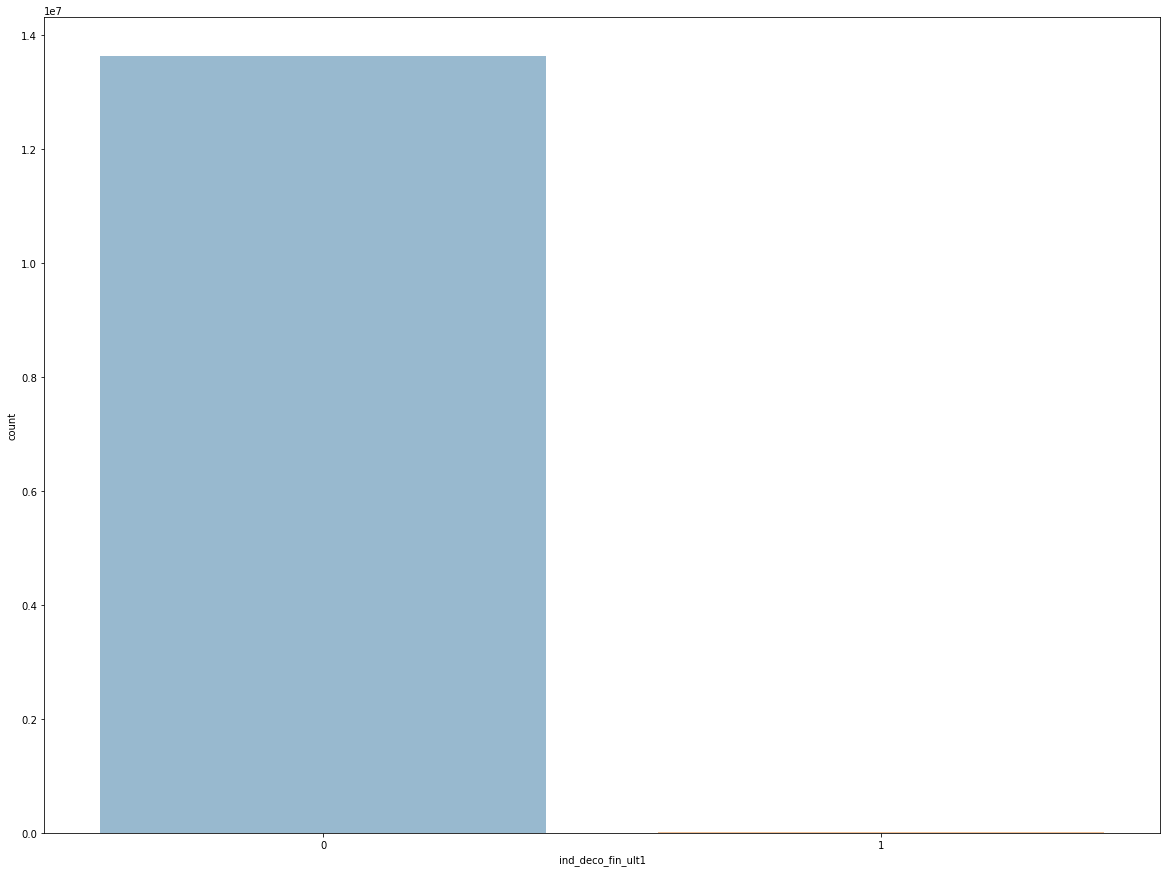

--------------------------------------------------
col :  ind_deme_fin_ult1


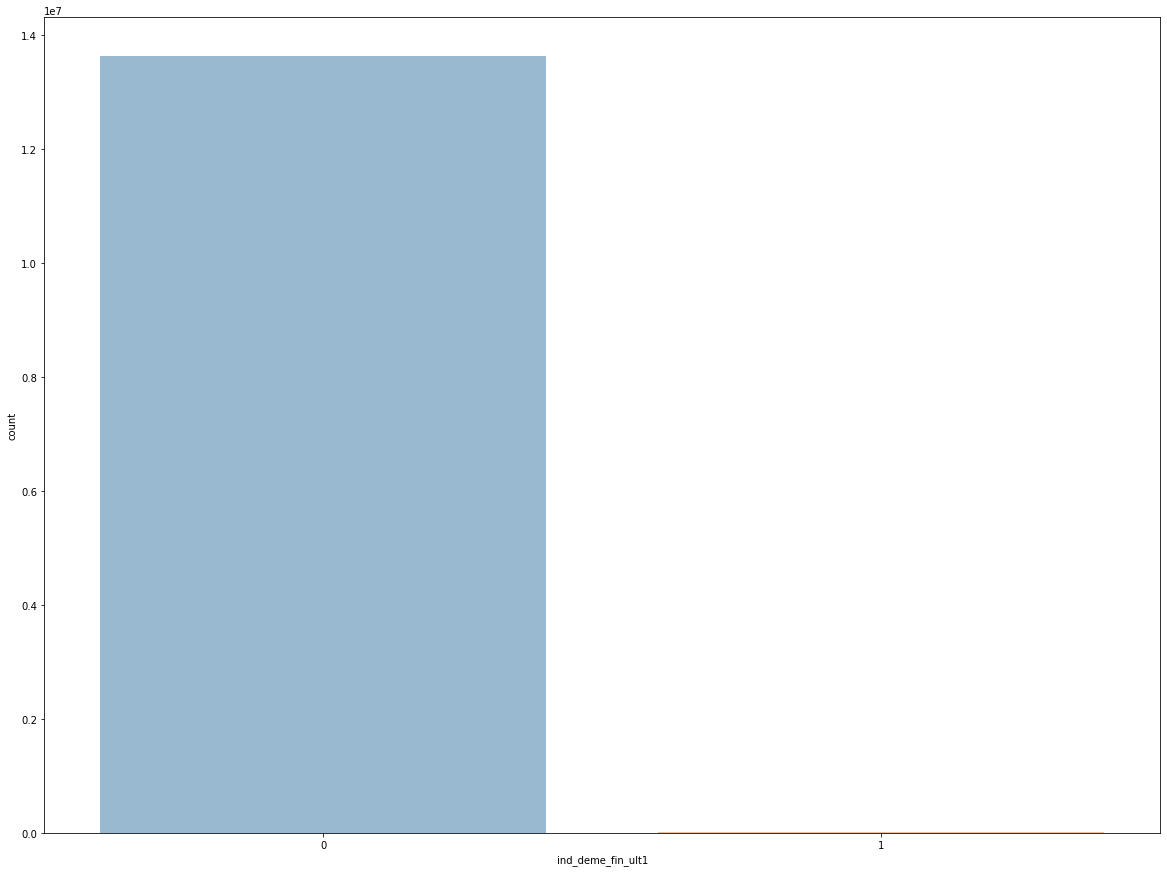

--------------------------------------------------
col :  ind_dela_fin_ult1


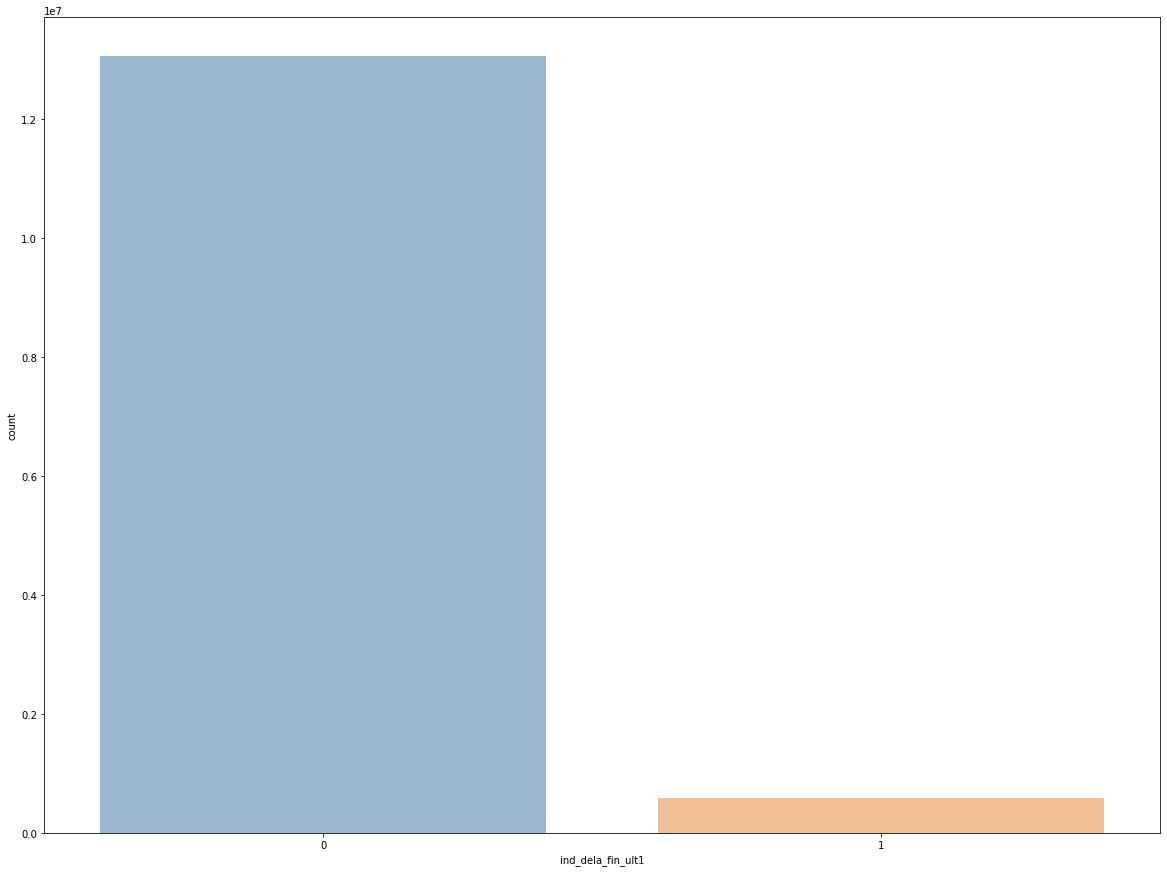

--------------------------------------------------
col :  ind_ecue_fin_ult1


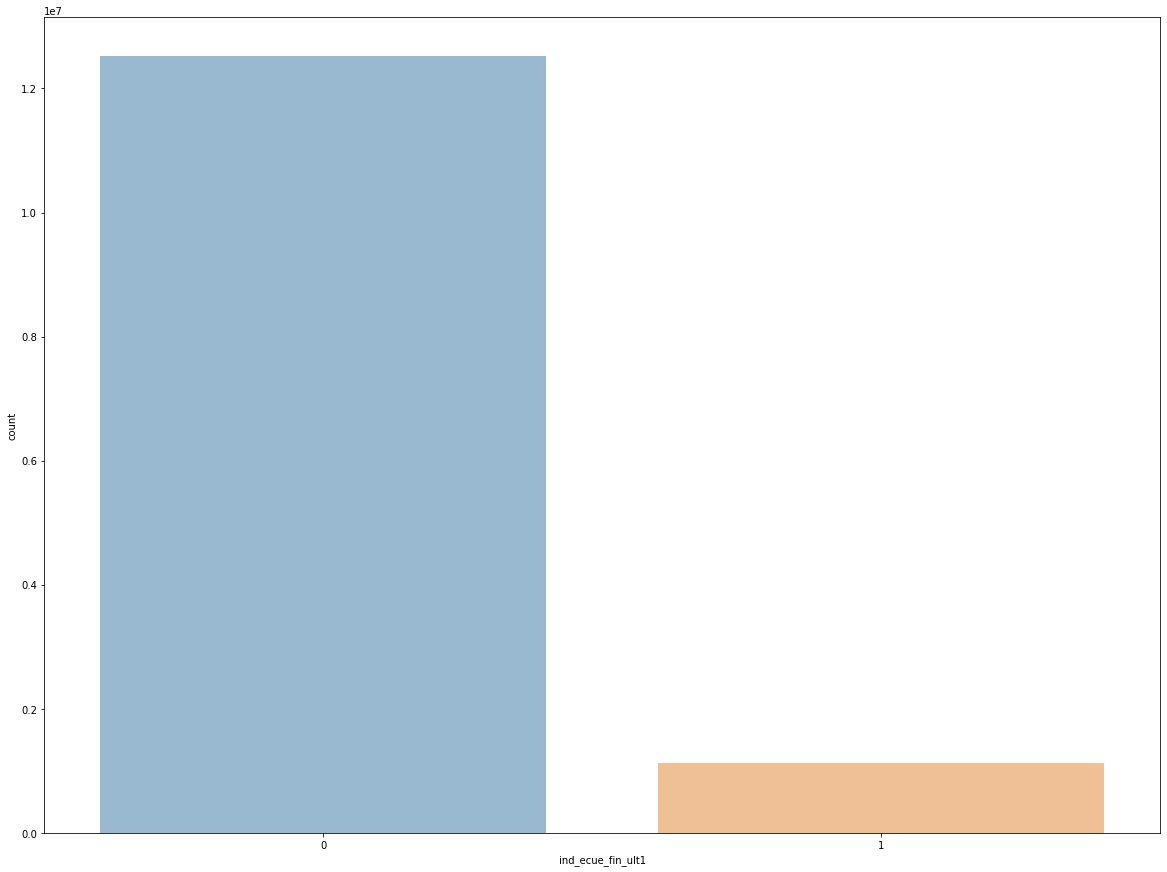

--------------------------------------------------
col :  ind_fond_fin_ult1


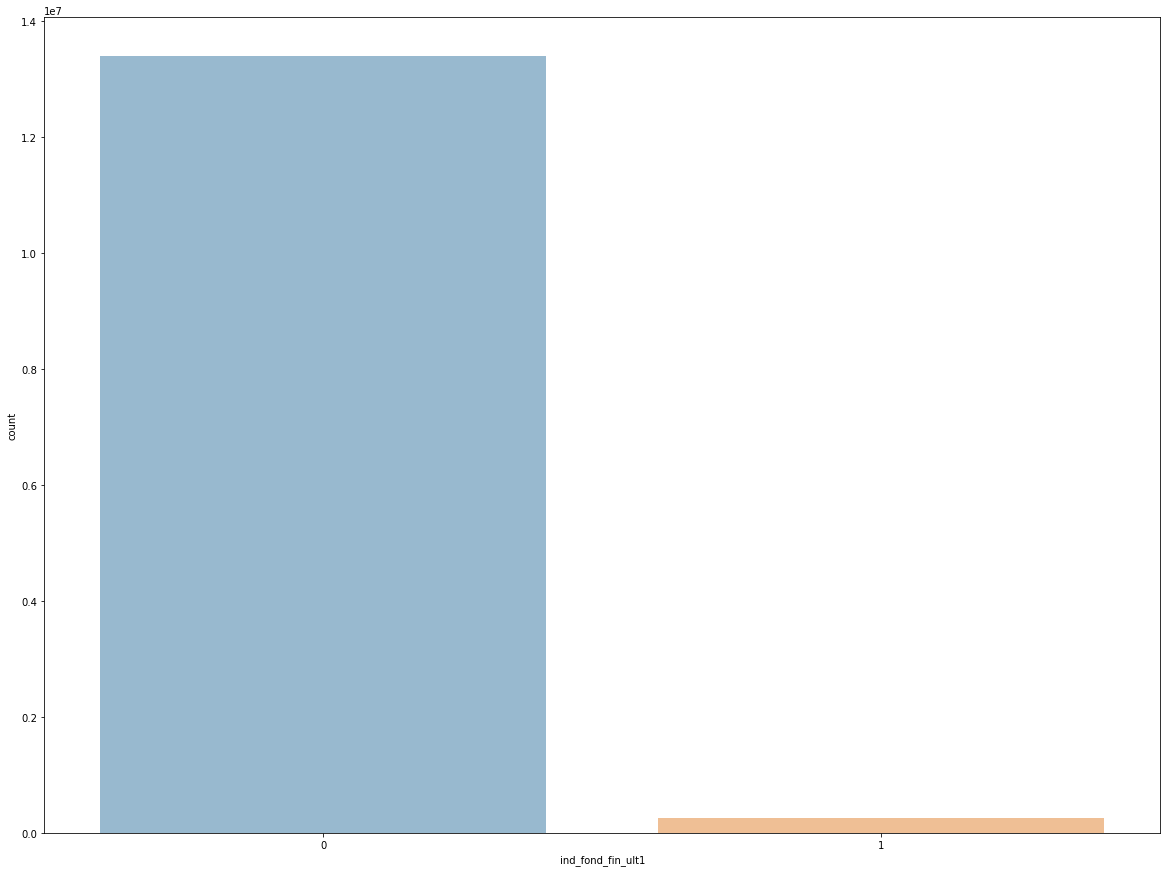

--------------------------------------------------
col :  ind_hip_fin_ult1


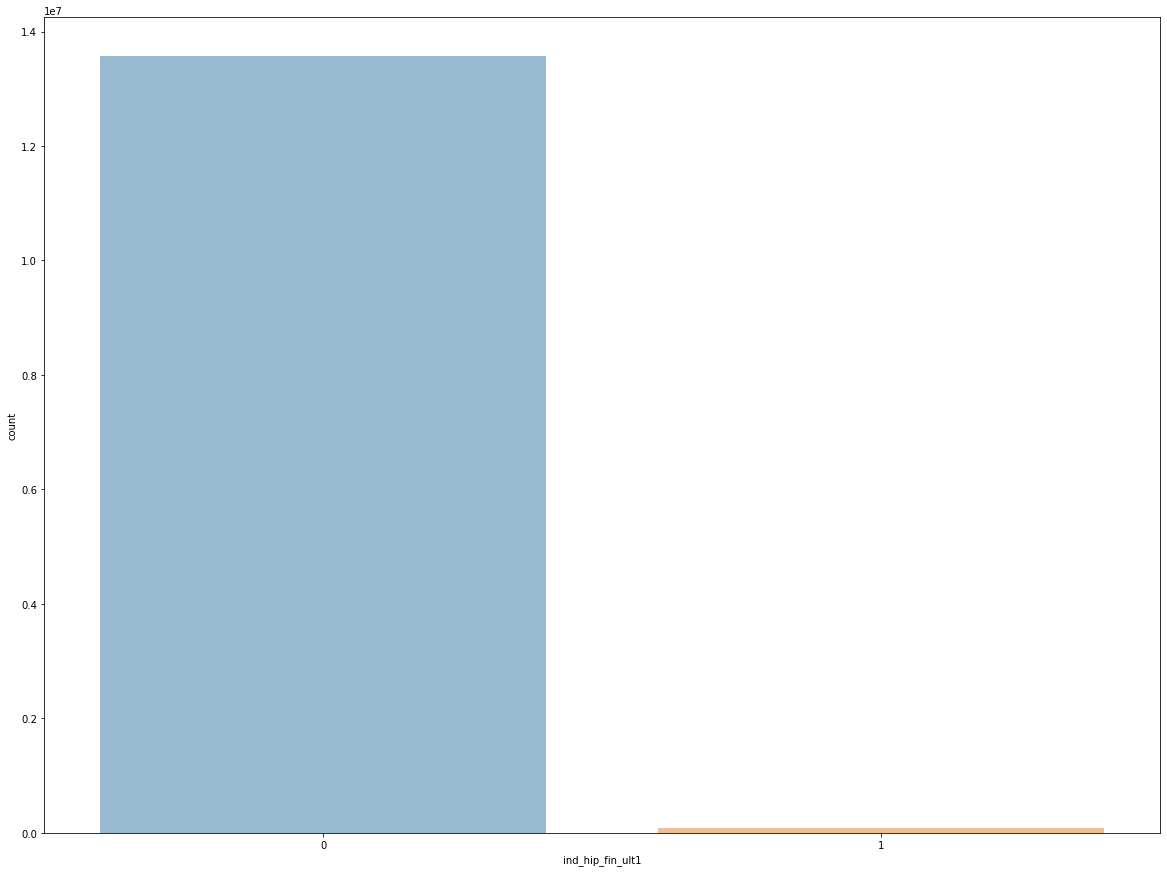

--------------------------------------------------
col :  ind_plan_fin_ult1


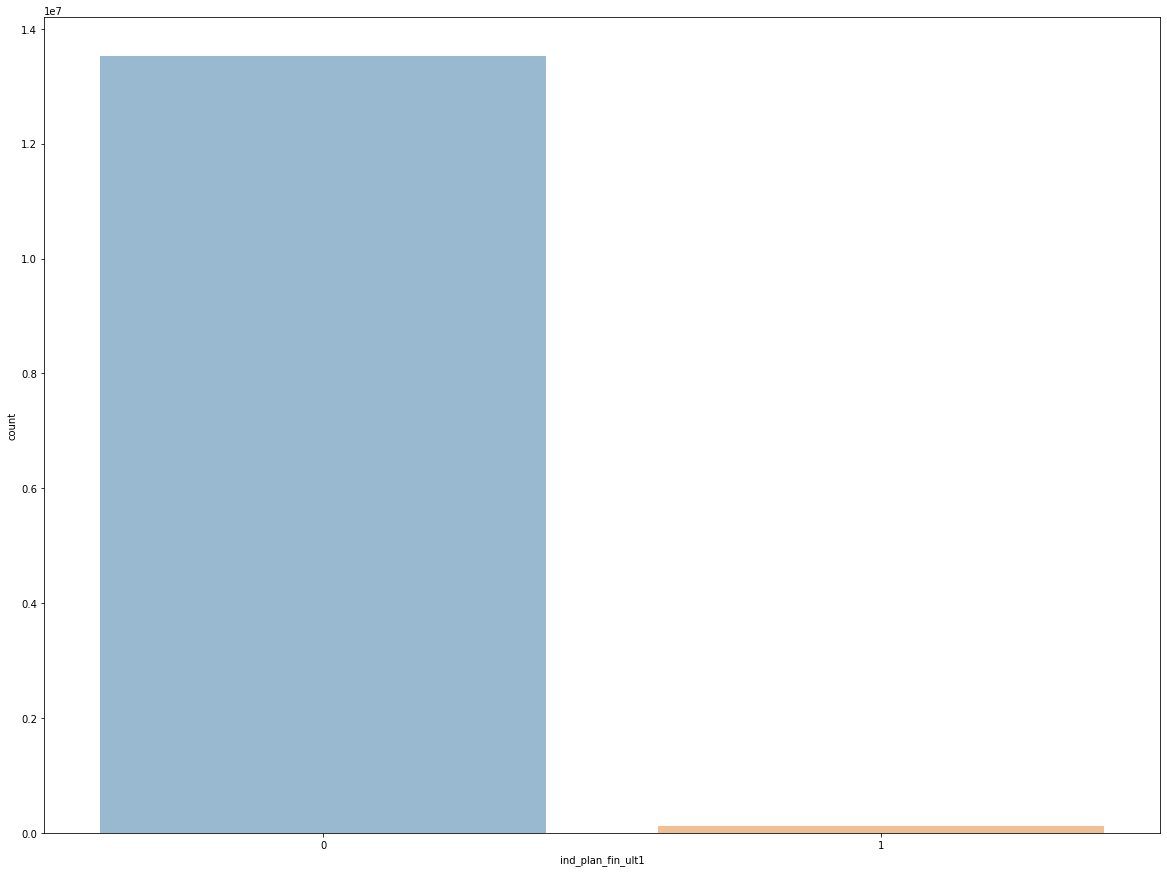

--------------------------------------------------
col :  ind_pres_fin_ult1


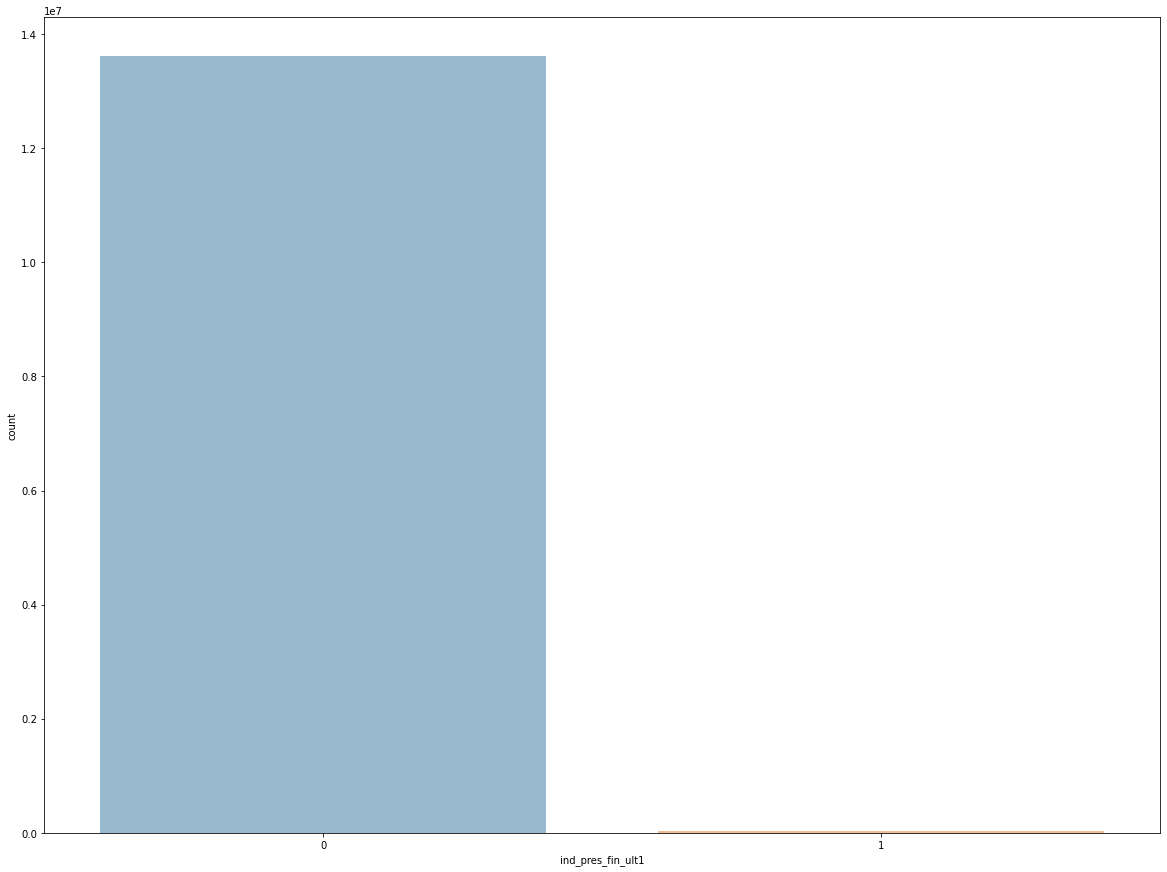

--------------------------------------------------
col :  ind_reca_fin_ult1


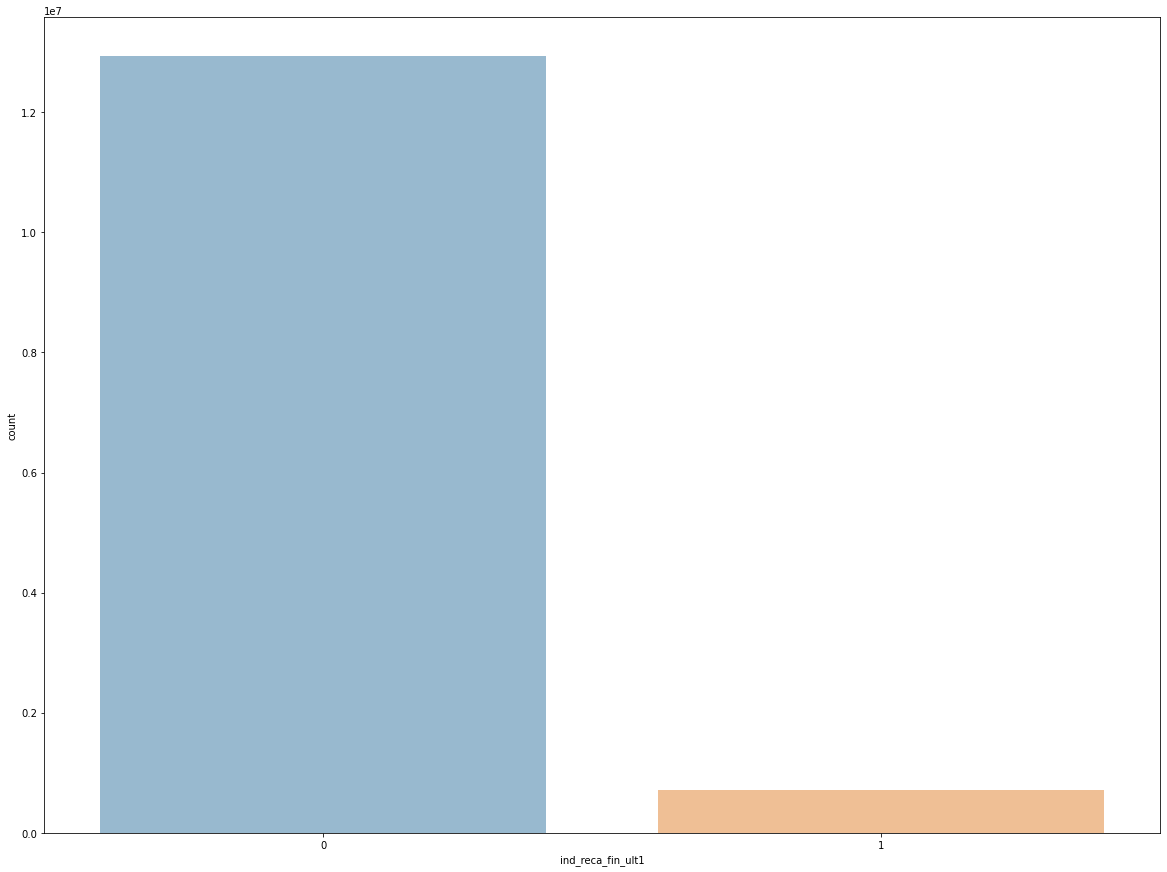

--------------------------------------------------
col :  ind_tjcr_fin_ult1


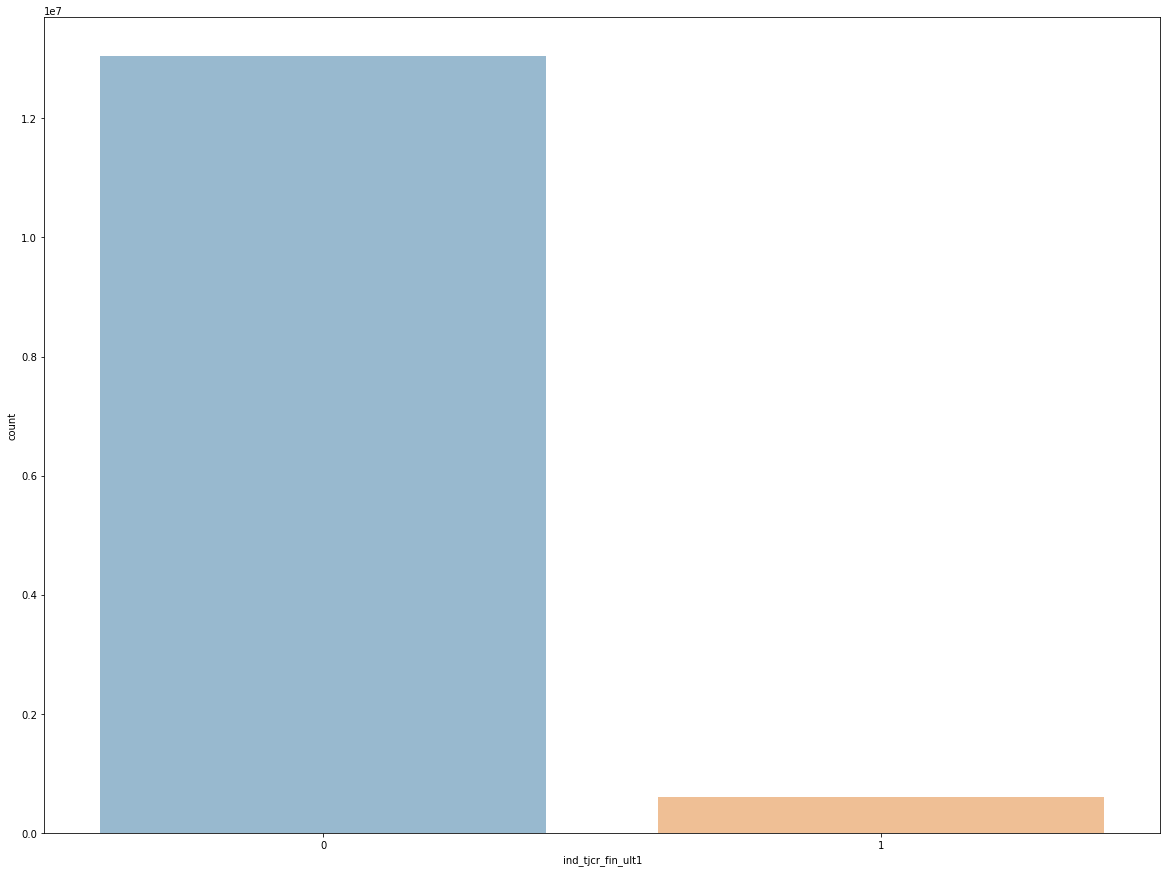

--------------------------------------------------
col :  ind_valo_fin_ult1


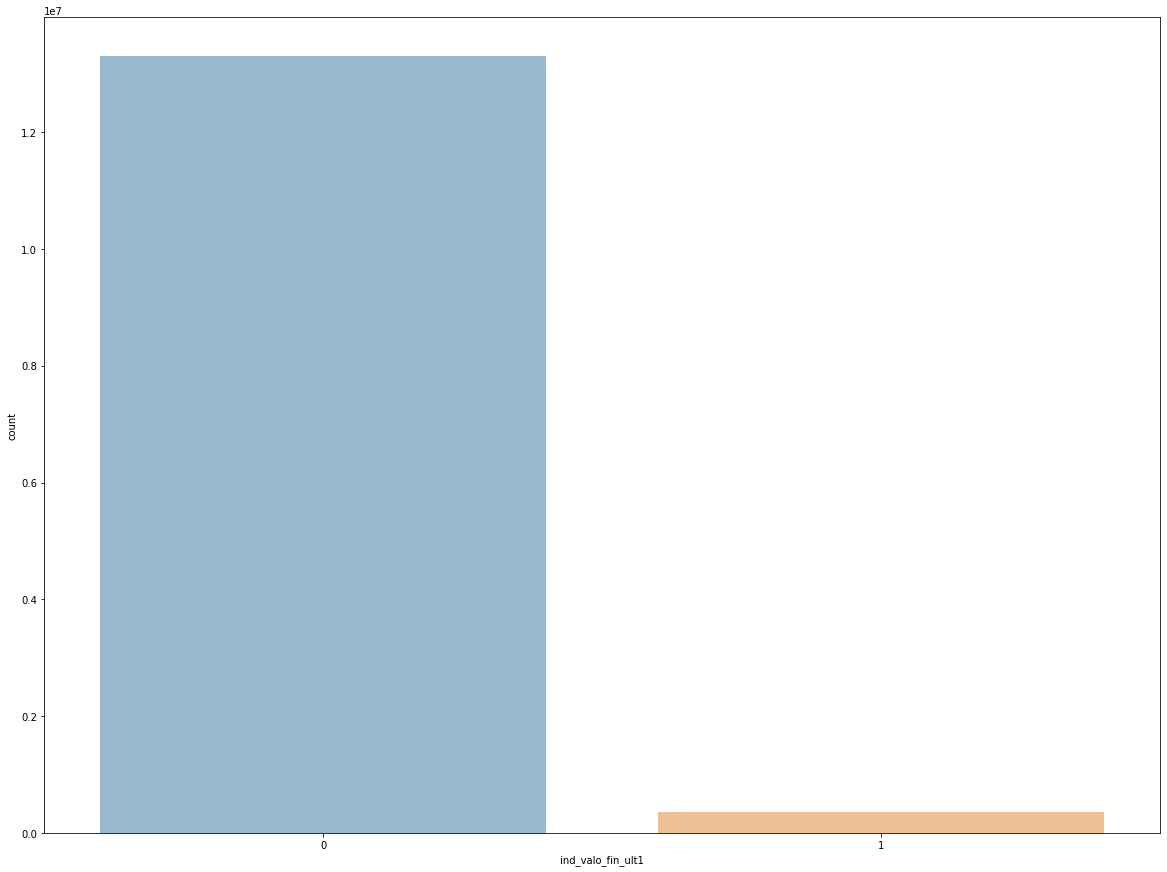

--------------------------------------------------
col :  ind_viv_fin_ult1


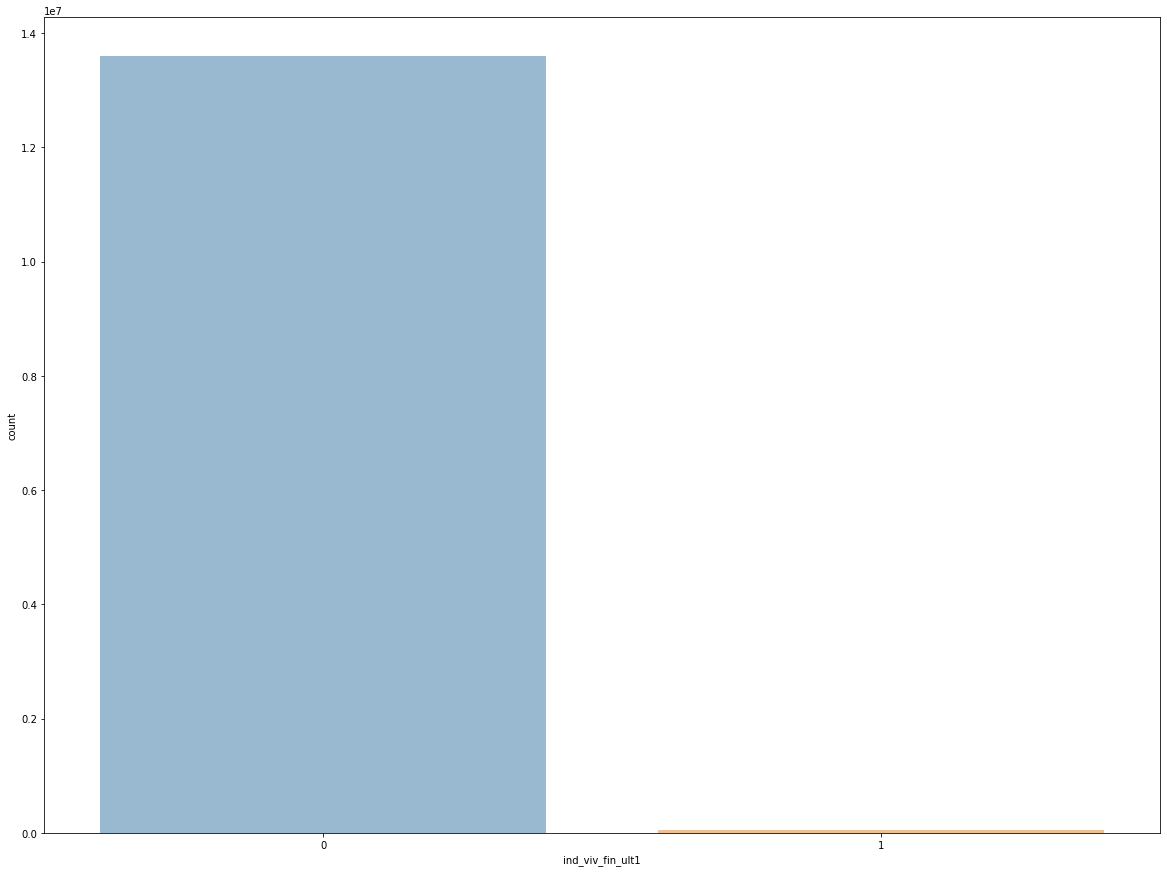

--------------------------------------------------
col :  ind_nomina_ult1


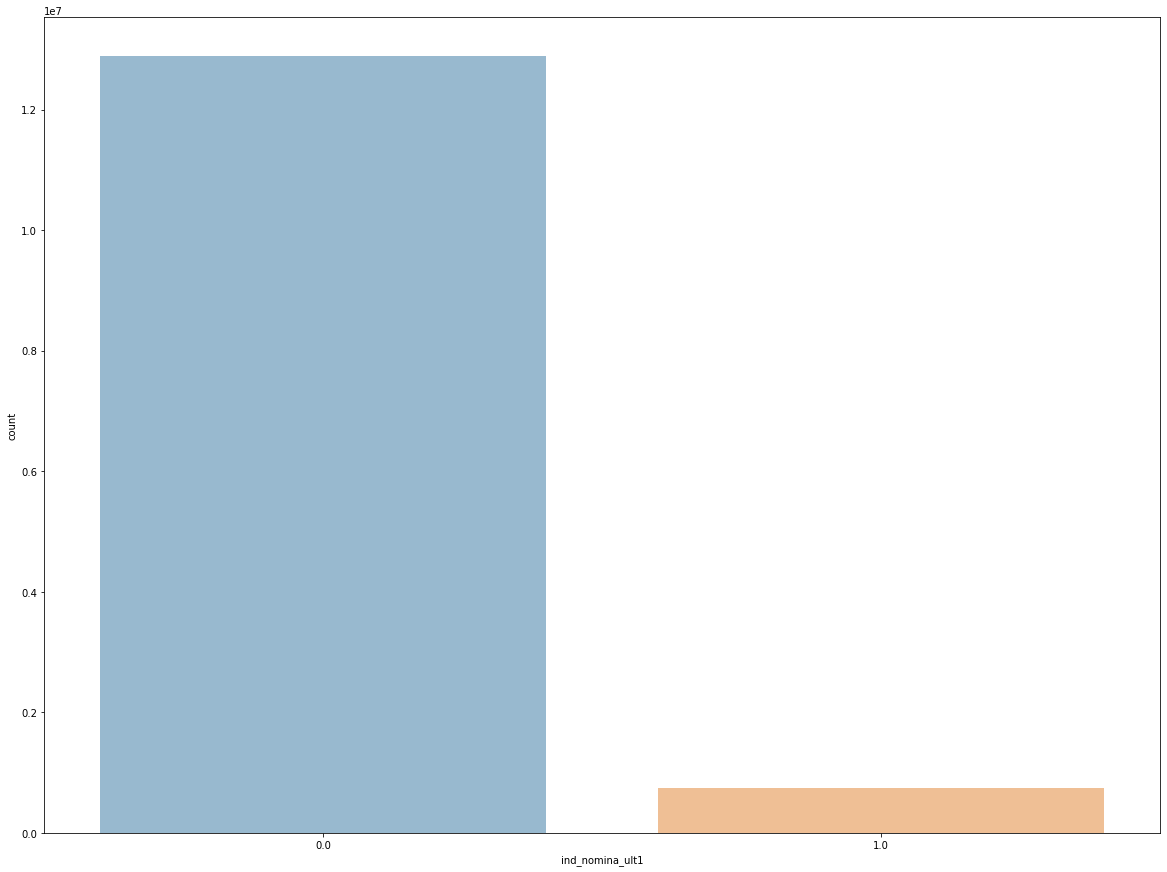

--------------------------------------------------
col :  ind_nom_pens_ult1


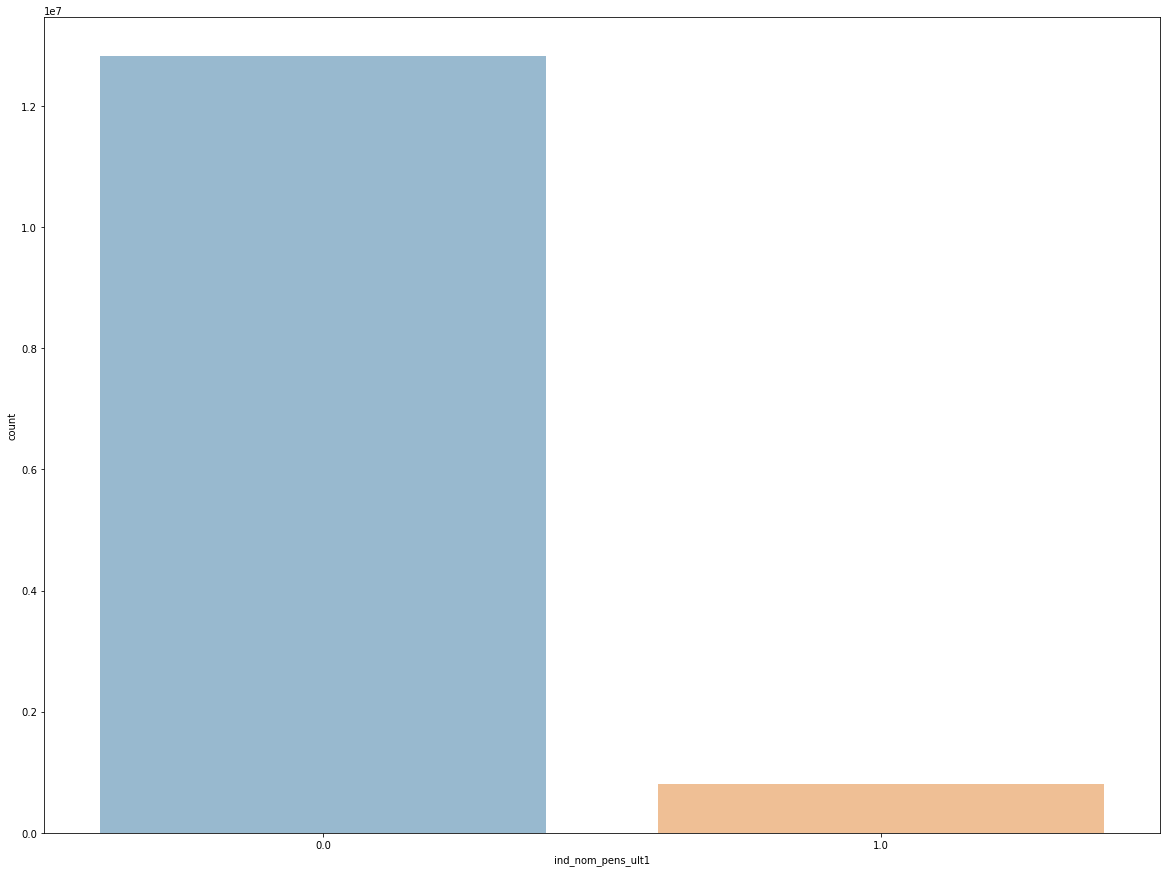

--------------------------------------------------
col :  ind_recibo_ult1


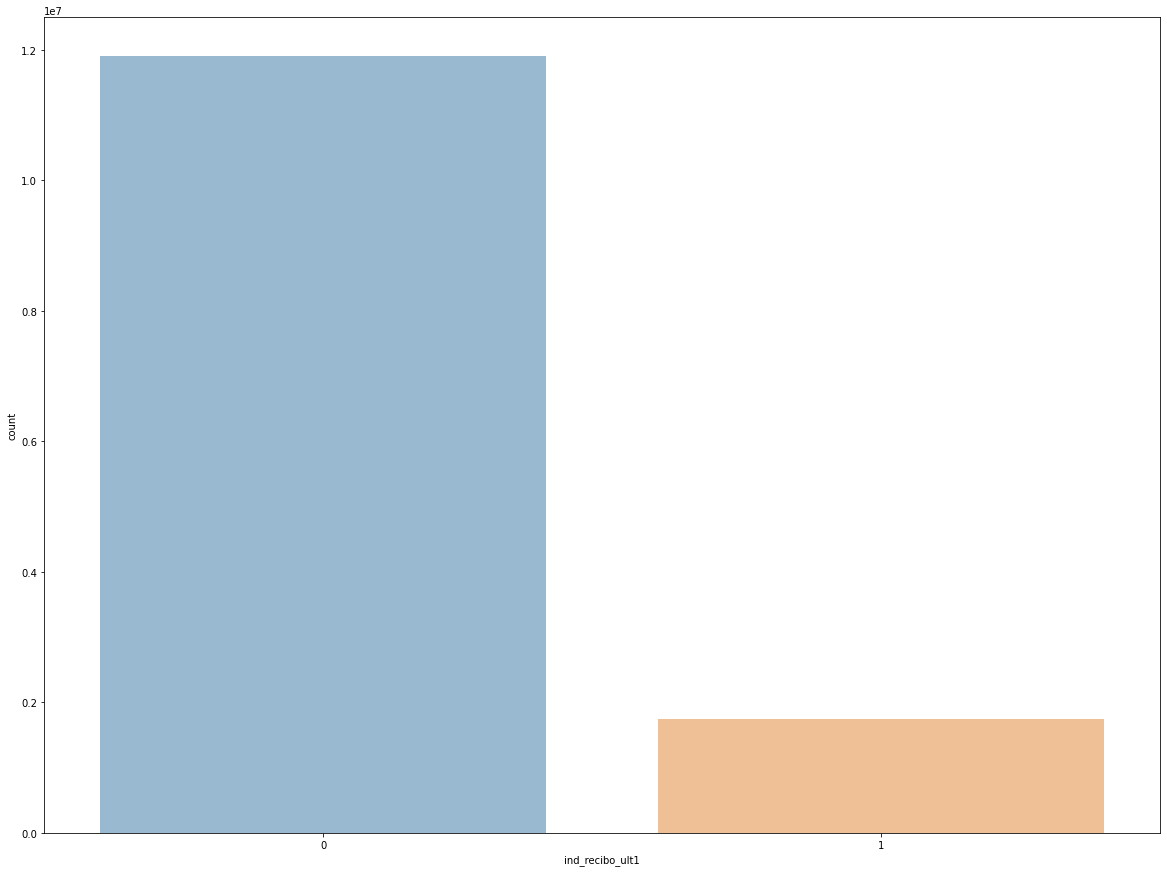

In [11]:
skip_cols = ['ncodpers', 'renta']
for col in trn.columns :
    if col in skip_cols:
        continue
        
    print('-'*50)
    print('col : ', col)
    
    f, ax = plt.subplots(figsize=(20,15))
    sns.countplot(x=col, data=trn, alpha = 0.5)
    plt.show()

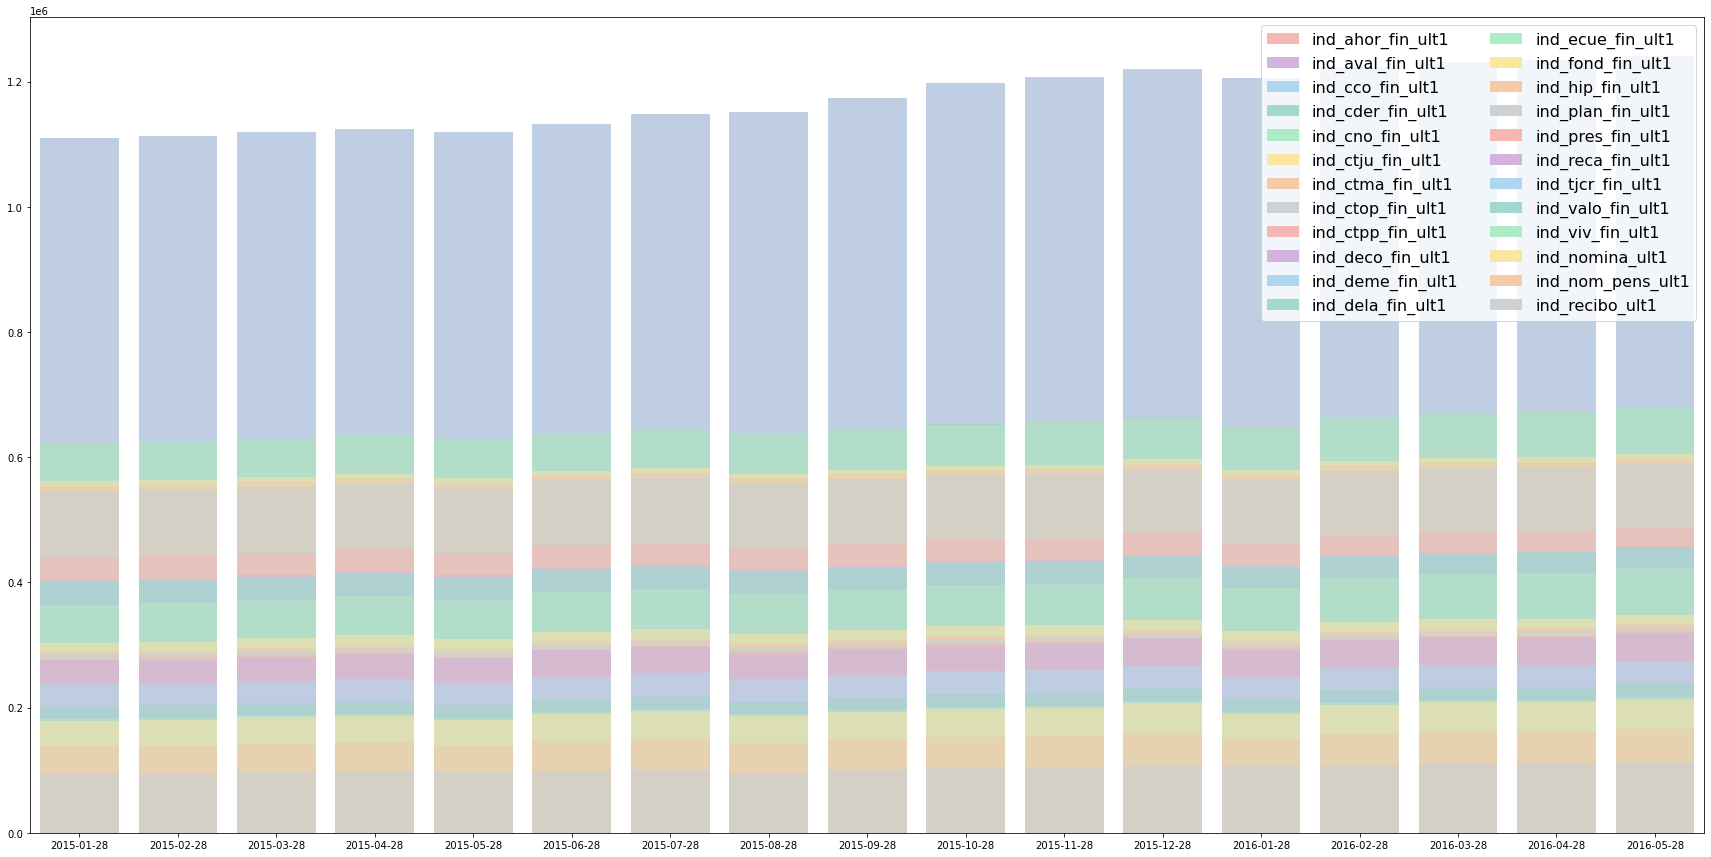

In [12]:
months = trn['fecha_dato'].unique().tolist()
label_cols = trn.columns[24:].tolist()

label_over_time = []
for i in range(len(label_cols)):
    label_sum = trn.groupby(['fecha_dato'])[label_cols[i]].agg('sum')
    label_over_time.append(label_sum.tolist())
    
label_sum_over_time = []
for i in range(len(label_cols)):
    label_sum_over_time.append(np.asarray(label_over_time[i:]).sum(axis=0))
    
color_list = ['#F5B7B1','#D2B4DE','#AED6F1','#A2D9CE','#ABEBC6','#F9E79F','#F5CBA7','#CCD1D1']

f, ax = plt.subplots(figsize=(30,15))
for i in range(len(label_cols)):
    sns.barplot(x=months, y=label_sum_over_time[i], color=color_list[i%8], alpha=0.7)
    
plt.legend([plt.Rectangle((0,0),1,1,fc=color_list[i%8], edgecolor = 'none') for i in range(len(label_cols))], label_cols, loc=1, ncol = 2, prop={'size':16})

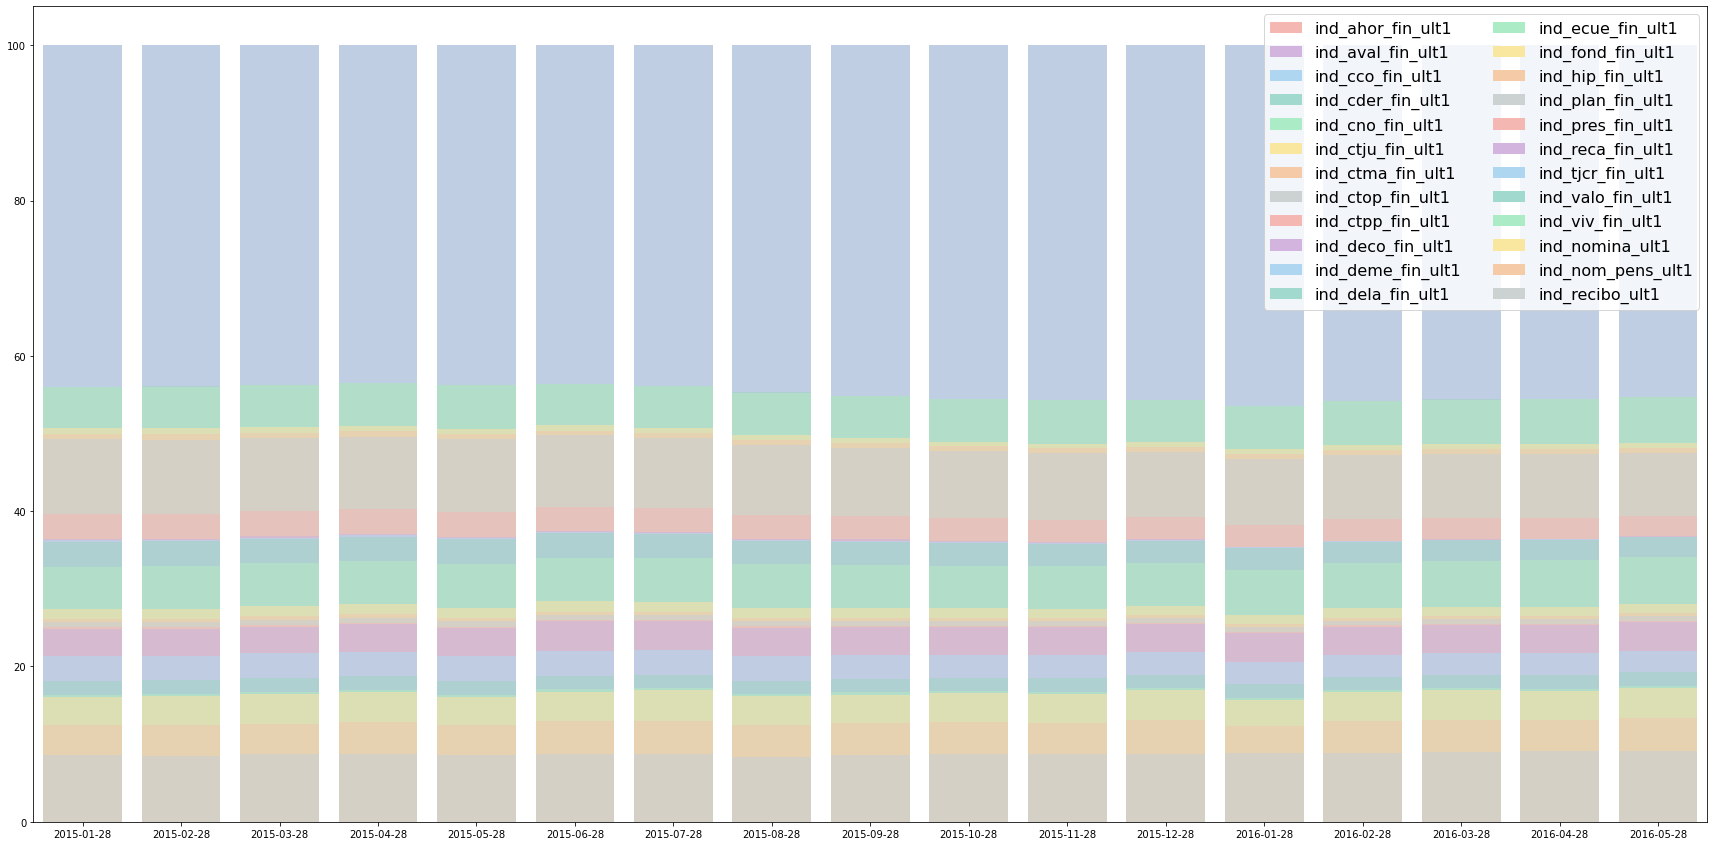

In [13]:
label_sum_percent = (label_sum_over_time / (1. * np.asarray(label_sum_over_time).max(axis=0))) *100

f, ax = plt.subplots(figsize=(30,15))
for i in range(len(label_cols)):
    sns.barplot(x=months, y=label_sum_percent[i], color=color_list[i%8], alpha=0.7)

plt.legend([plt.Rectangle((0,0),1,1,fc=color_list[i%8], edgecolor = 'none') for i in range(len(label_cols))], label_cols, loc=1, ncol = 2, prop={'size':16})

In [14]:
prods = trn.columns[24:].tolist()

def date_to_int(str_date):
    Y, M, D = [int(a) for a in str_date.strip().split('-')]
    int_date = (int(Y) - 2015) * 12 + int(M)
    return int_date

trn['int_date'] = trn['fecha_dato'].map(date_to_int).astype(np.int8)

trn_lag = trn.copy()
trn_lag['int_date'] += 1
trn_lag.columns = [col + '_prev' if col not in ['ncodpers', 'int_date'] else col for col in trn.columns]

df_trn = trn.merge(trn_lag, on=['ncodpers', 'int_date'], how='left')

del trn, trn_lag

for prod in prods:
    prev = prod + '_prev'
    df_trn[prev].fillna(0, inplace=True)

for prod in prods :
    padd = prod + "_add"
    prev = prod + "_prev"
    df_trn[padd] = ((df_trn[prod] == 1) & (df_trn[prev] == 0)).astype(np.int8)
    
add_cols = [prod + '_add' for prod in prods]
labels = df_trn[add_cols].copy()
labels.columns = prods
labels.to_csv('./preprocessed/labels.csv', index=False)

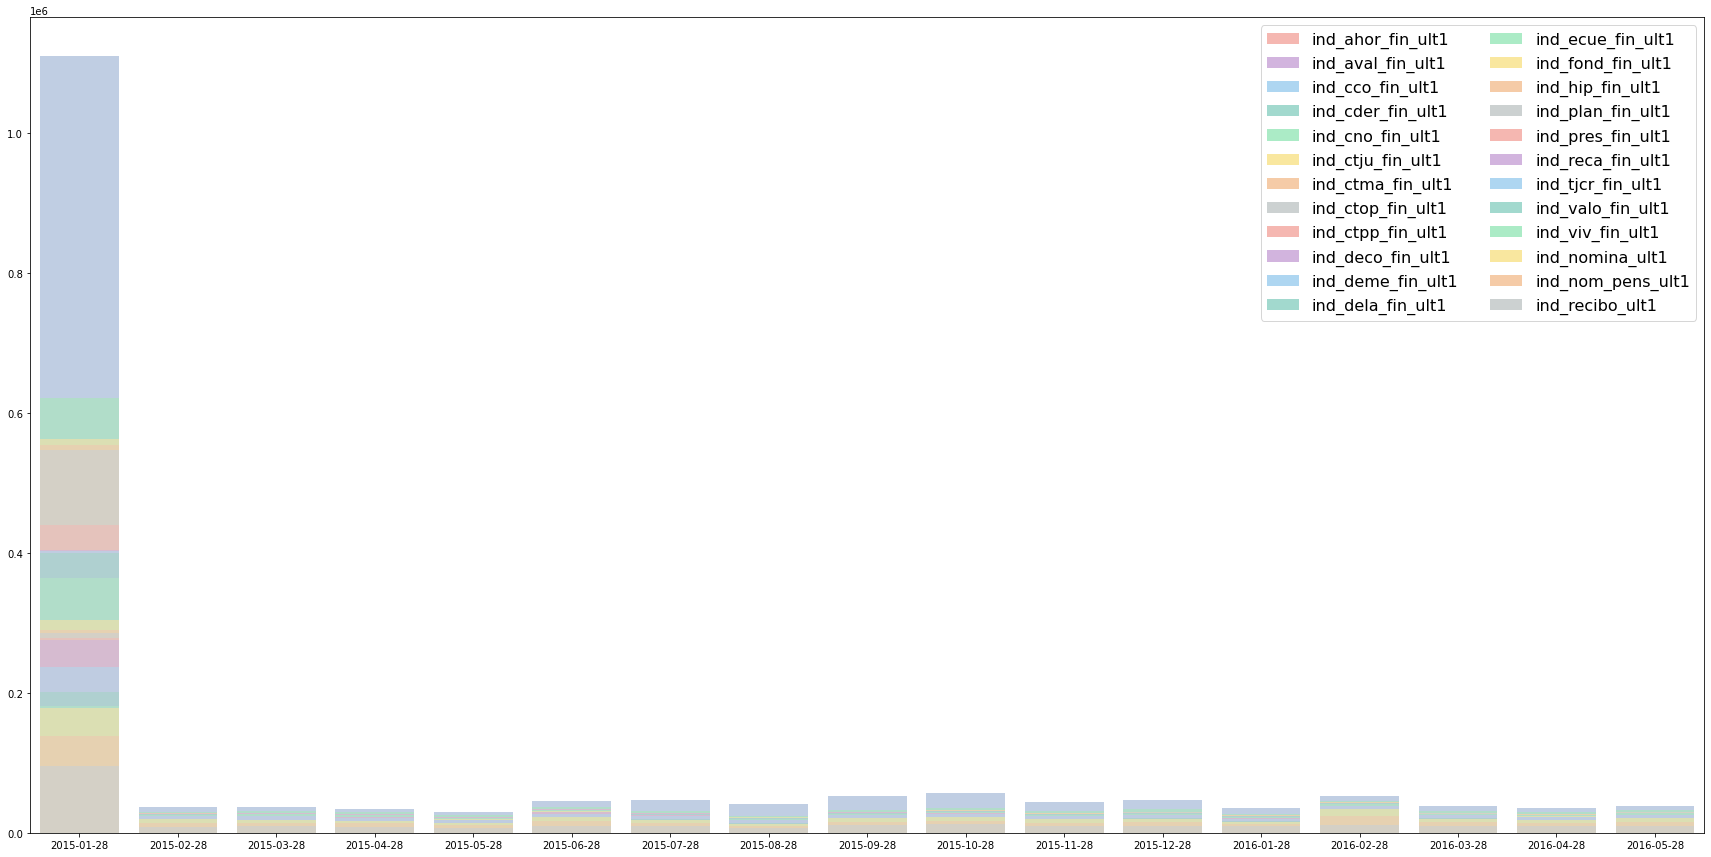

In [15]:
labels = pd.read_csv('./preprocessed/labels.csv').astype(int)
fecha_dato = pd.read_csv('./data/2장/train_ver2.csv', usecols=['fecha_dato'])

labels['date'] = fecha_dato.fecha_dato
months = np.unique(fecha_dato.fecha_dato).tolist()
label_cols = labels.columns.tolist()[:24]

label_over_time = []
for i in range(len(label_cols)) :
    label_over_time.append(labels.groupby(['date'])[label_cols[i]].agg('sum').tolist())
    
label_sum_over_time = []
for i in range(len(label_cols)) :
    label_sum_over_time.append(np.asarray(label_over_time[i:]).sum(axis=0))
    
color_list = ['#F5B7B1','#D2B4DE','#AED6F1','#A2D9CE','#ABEBC6','#F9E79F','#F5CBA7','#CCD1D1']

f,ax = plt.subplots(figsize=(30,15))
for i in range(len(label_cols)):
    sns.barplot(x=months, y=label_sum_over_time[i], color=color_list[i%8], alpha=0.7)
plt.legend([plt.Rectangle((0,0), 1, 1, fc=color_list[i%8], edgecolor = 'none') for i in range(len(label_cols))], label_cols, loc=1, ncol=2, prop={'size':16})

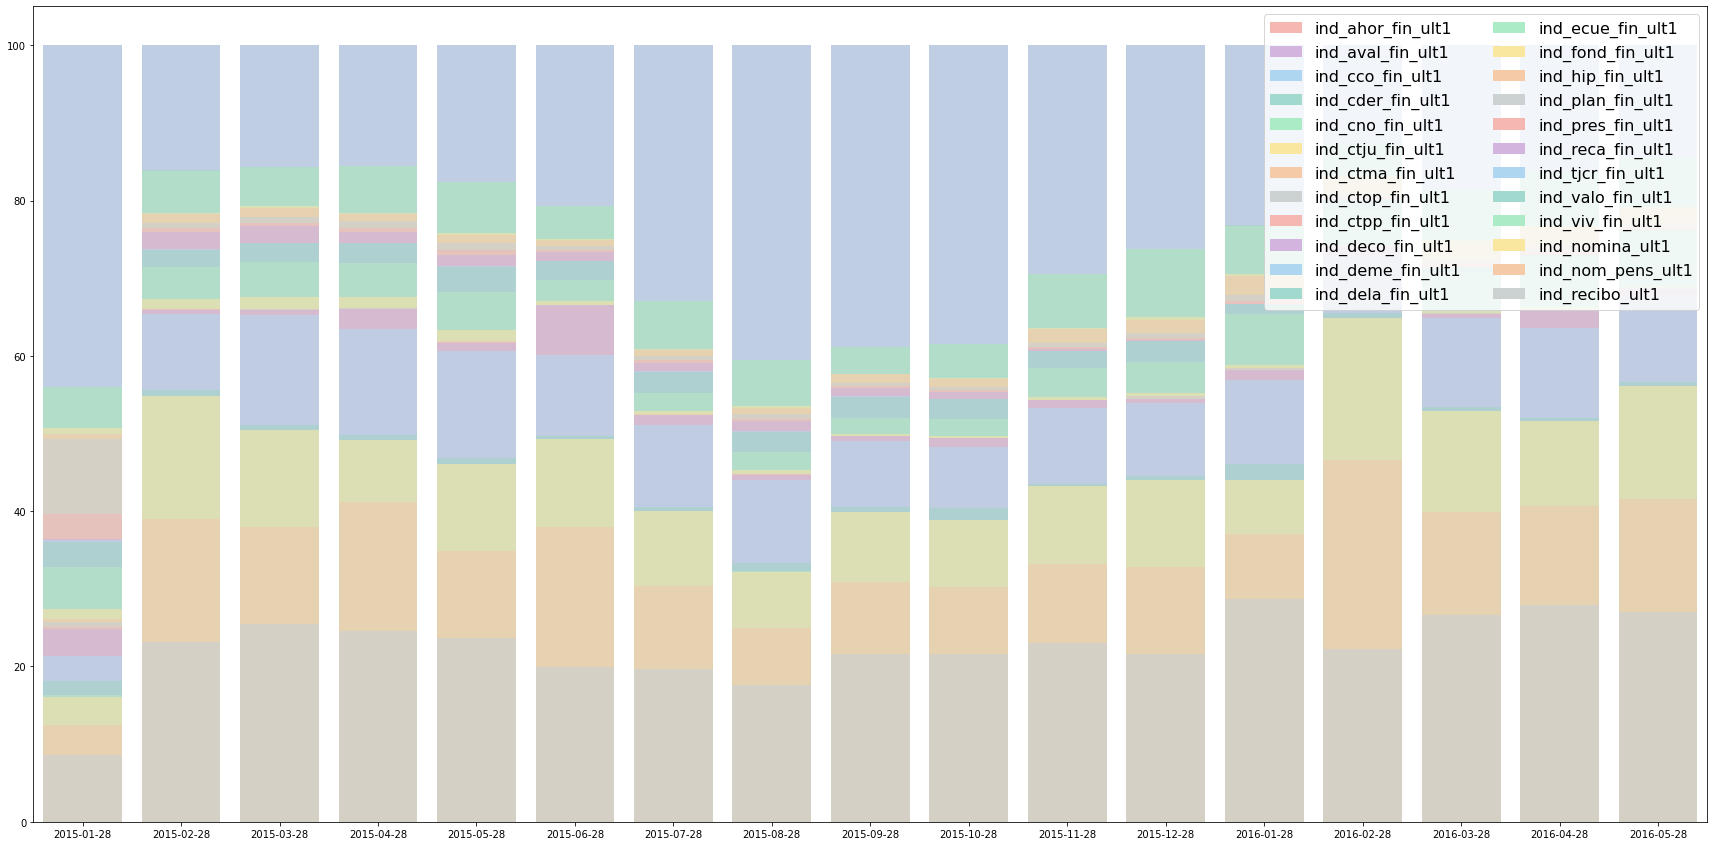

In [16]:
label_sum_percent = (label_sum_over_time / (1.*np.asarray(label_sum_over_time).max(axis=0))) * 100
f, ax = plt.subplots(figsize = (30, 15))
for i in range(len(label_cols)):
    sns.barplot(x=months, y=label_sum_percent[i], color= color_list[i%8], alpha=0.7)
    
plt.legend([plt.Rectangle((0,0), 1, 1, fc=color_list[i%8], edgecolor = 'none') for i in range(len(label_cols))], 
          label_cols, loc=1, ncol=2, prop={'size':16})

데이터가 계절성을 띄면, 모델링 방법도 2가지.
- 계절의 변동성을 모델링하는 하나의 일반적인 모델을 구축할 것인지,
- 계절에 따라 다수의 모델을 구축하여 혼합해서 사용할지

탐색적 데이터 분석 방법
1. 기초 통계
2. 시각화

In [30]:
import pandas as pd
import numpy as np
import xgboost as xgb

np.random.seed(2018)

trn = pd.read_csv('./data/2장/train_ver2.csv')
tst = pd.read_csv('./data/2장/test_ver2.csv')

# 데이터 전처리
prods = trn.columns[24:].tolist()

trn[prods] = trn[prods].fillna(0.0).astype(np.int8)

no_product = trn[prods].sum(axis=1) == 0
trn = trn[~no_product]

for col in trn.columns[24:]:
    tst[col] = 0
df = pd.concat([trn, tst], axis=0)

features = []

categorical_cols = ['ind_empleado', 'pais_residencia', 'sexo', 'tiprel_1mes', 'indresi', 'indext', 'conyuemp', 
                   'canal_entrada', 'indfall', 'tipodom', 'nomprov', 'segmento']
for col in categorical_cols :
    df[col], _ = df[col].factorize(na_sentinel=-99)
features += categorical_cols

df['age'].replace(' NA', -99, inplace=True)
df['age'] = df['age'].astype(np.int8)

df['antiguedad'].replace('     NA', -99, inplace=True)
df['antiguedad'] = df['antiguedad'].astype(np.int8)

df['renta'].replace('         NA', -99, inplace=True)
df['renta'].fillna(-99, inplace=True)
df['renta'] = df['renta'].astype(float).astype(np.int8)

df['indrel_1mes'].replace('P', 5, inplace=True)
df['indrel_1mes'].fillna(-99, inplace = True)
df['indrel_1mes'] = df['indrel_1mes'].astype(float).astype(np.int8)

features += ['age', 'antiguedad', 'renta', 'ind_nuevo', 'indrel', 'indrel_1mes', 'ind_actividad_cliente']

/Users/jeonsojeong/mambaforge/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (5,8,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/jeonsojeong/mambaforge/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


- 사이킷 런에서 제공하는 머신러닝 모델은 결측값을 input으로 받지 않으나
- xgboost 에서는 결측값도 정상적인 입력값으로 받는다.

In [31]:
df['fecha_alta_month'] = df['fecha_alta'].map(lambda x: 0.0 if x.__class__ is float else float(x.split('-')[1])).astype(np.int8)
df['fecha_alta_year'] = df['fecha_alta'].map(lambda x: 0.0 if x.__class__ is float else float(x.split('-')[0])).astype(np.int16)
features += ['fecha_alta_month', 'fecha_alta_year']

df['ult_fec_cli_1t_month'] = df['ult_fec_cli_1t'].map(lambda x: 0.0 if x.__class__ is float else float(x.split('-')[1])).astype(np.int8)
df['ult_fec_cli_1t_year'] = df['ult_fec_cli_1t'].map(lambda x: 0.0 if x.__class__ is float else float(x.split('-')[0])).astype(np.int16)
features += ['ult_fec_cli_1t_month', 'ult_fec_cli_1t_year']

df.fillna(-99, inplace=True)

def date_to_int(str_date) :
    Y, M, D = [int(a) for a in str_date.strip().split("-")]
    int_date = (int(Y)-2015)*12 + int(M)
    return int_date

df['int_date'] = df['fecha_dato'].map(date_to_int).astype(np.int8)

df_lag = df.copy()
df_lag.columns = [col + '_prev' if col not in ['ncodpers', 'int_date'] else col for col in df.columns]
df_lag['int_date'] += 1

df_trn = df.merge(df_lag, on=['ncodpers', 'int_date'], how='left')

del df, df_lag

for prod in prods : 
    prev = prod + '_prev'
    df_trn[prev].fillna(0, inplace=True)
df_trn.fillna(-99, inplace=True)

features += [feature + '_prev' for feature in features]
features += [prod + '_prev' for prod in prods]

In [32]:
use_dates = ['2016-01-28', '2016-02-28', '2016-03-28', '2016-04-28', '2016-05-28']
trn = df_trn[df_trn['fecha_dato'].isin(use_dates)]
tst = df_trn[df_trn['fecha_dato'] == '2016-06-28']
del df_trn

X = []
Y = []
for i, prod in enumerate(prods):
    prev = prod + '_prev'
    prX = trn[(trn[prod]==1) & (trn[prev] ==0)]
    prY = np.zeros(prX.shape[0], dtype=np.int8) + i
    X.append(prX)
    Y.append(prY)
XY = pd.concat(X)
Y = np.hstack(Y)
XY['y'] = Y

vld_date = '2016-05-28'
XY_trn = XY[XY['fecha_dato'] != vld_date ]
XY_vld = XY[XY['fecha_dato'] == vld_date ]

- 파라미터 튜닝 보다는 피처 엔지니어링에 많은 시간을 쏟을 것을 권장.

In [34]:
param = {
    'booster' : 'gbtree',
    'max_depth' : 8, 
    'nthread': 4,
    'num_class' : len(prods),
    'objective' : 'multi:softprob',
    'silent' : 1,
    'eval_metric' : 'mlogloss',
    'eta' : 0.1,
    'min_child_weight' : 10,
    'colsample_bytree' : 0.8,
    'colsample_bylevel' : 0.9,
    'seed' : 2018
}

# python 3.9 버전에서 as_matrix 삭제된 듯하다. 대신 values 사용하였음.
X_trn = XY_trn[features].values
Y_trn = XY_trn['y'].values
dtrn = xgb.DMatrix(X_trn, label=Y_trn, feature_names=features)

X_vld = XY_vld[features].values
Y_vld = XY_vld['y'].values
dvld = xgb.DMatrix(X_vld, label=Y_vld, feature_names=features)

watch_list = [(dtrn, 'train'), (dvld, 'eval')]
model = xgb.train(param, dtrn, num_boost_round=1000, evals=watch_list, early_stopping_rounds=20)

[14:46:23] WARNING: /private/var/folders/xh/nqmn22xj2vj4lfhjb63y7v3h0000gn/T/pip-install-fc181vmu/xgboost_b963d22becfd4bfcb4b6dcd4f3e21522/build/temp.macosx-11.0-arm64-3.9/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-mlogloss:2.68092	eval-mlogloss:2.68980
[1]	train-mlogloss:2.46791	eval-mlogloss:2.48087
[2]	train-mlogloss:2.29254	eval-mlogloss:2.30787
[3]	train-mlogloss:2.15647	eval-mlogloss:2.17447
[4]	train-mlogloss:2.04496	eval-mlogloss:2.06416
[5]	train-mlogloss:1.94649	eval-mlogloss:1.96528
[6]	train-mlogloss:1.86704	eval-mlogloss:1.88623
[7]	train-mlogloss:1.79857	eval-mlogloss:1.81833
[8]	train-mlogloss:1.73422	eval-mlogloss:1.75382
[9]	train-mlogloss:1.67965	eval-mlogloss:1.69974
[10]	train-mlogloss:1.629

[154]	train-mlogloss:1.00411	eval-mlogloss:1.08820
[155]	train-mlogloss:1.00355	eval-mlogloss:1.08816
[156]	train-mlogloss:1.00300	eval-mlogloss:1.08808
[157]	train-mlogloss:1.00243	eval-mlogloss:1.08807
[158]	train-mlogloss:1.00188	eval-mlogloss:1.08799
[159]	train-mlogloss:1.00129	eval-mlogloss:1.08798
[160]	train-mlogloss:1.00069	eval-mlogloss:1.08800
[161]	train-mlogloss:1.00002	eval-mlogloss:1.08800
[162]	train-mlogloss:0.99955	eval-mlogloss:1.08793
[163]	train-mlogloss:0.99911	eval-mlogloss:1.08795
[164]	train-mlogloss:0.99852	eval-mlogloss:1.08793
[165]	train-mlogloss:0.99795	eval-mlogloss:1.08789
[166]	train-mlogloss:0.99730	eval-mlogloss:1.08791
[167]	train-mlogloss:0.99680	eval-mlogloss:1.08786
[168]	train-mlogloss:0.99624	eval-mlogloss:1.08780
[169]	train-mlogloss:0.99573	eval-mlogloss:1.08776
[170]	train-mlogloss:0.99522	eval-mlogloss:1.08773
[171]	train-mlogloss:0.99476	eval-mlogloss:1.08767
[172]	train-mlogloss:0.99415	eval-mlogloss:1.08761
[173]	train-mlogloss:0.99358	ev

FileNotFoundError: [Errno 2] No such file or directory: 'model/xgb.baseline.pkl'

In [36]:
import pickle
pickle.dump(model, open("./model/xgb.baseline.pkl", "wb"))
best_ntree_limit = model.best_ntree_limit

In [51]:
# 오류 체크하기.

vld = trn[trn['fecha_dato'] == vld_date]
ncodpers_vld = vld['ncodpers'].values

for prod in prods :
    prev = prod + '_prev'
    padd = prod + '_add'
    vld[padd] = vld[prod] - vld[prev]
add_vld = vld[[prod + '_add' for prod in prods]].values
add_vld_list = [list() for i in range(len(ncodpers_vld))]

count_vld = 0
for ncodper in range(len(ncodpers_vld)) :
    for prod in range(len(prods)) :
        if add_vld[ncodper, prod] > 0 :
            add_vld_list[ncodper].append(prod)
            count_vld += 1
                     
print(mapk(add_vld_list, add_vld_list, 7, 0.0))

X_vld = vld[features].values
Y_vld = vld['y'].values
dvld = xgb.DMatrix(X_vld, lavel=Y_vld, feature_names = features)
preds_vld = model.predict(dvld, ntree_limit=best_ntree_limit)

preds_vld = preds_vld - vld[[prod + '_prev' for prod in prods]].values

result_vld = []
for ncodper, pred in zip(ncodpers_vld, preds_vld) :
    y_prods = [(y, p, ip) for y, p, ip in zip(pred, prods, range(len(prods)))]
    y_prods = sorted(y_prods, key=lambda a:a[0], reverse=True)[:7]
    result_vld.append([ip for y,p,ip in y_prods])
    
print(mapk(add_vld_list, result_vld, 7, 0.0))

<ipython-input-51-23a32e94c3ef>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vld[padd] = vld[prod] - vld[prev]


TypeError: unsupported operand type(s) for +: 'NoneType' and 'NoneType'

In [52]:
X_all = XY[features].values
Y_all = XY['y'].values
dall = xgb.DMatrix(X_all, label=Y_all, feature_names = features)
watch_list = [(dall, 'train')]

best_ntree_limit = int(best_ntree_limit * (len(XY_trn) + len(XY_vld)) / len(XY_trn))

model = xgb.train(param, dall, num_boost_round = best_ntree_limit, evals=watch_list)

[16:21:54] WARNING: /private/var/folders/xh/nqmn22xj2vj4lfhjb63y7v3h0000gn/T/pip-install-fc181vmu/xgboost_b963d22becfd4bfcb4b6dcd4f3e21522/build/temp.macosx-11.0-arm64-3.9/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-mlogloss:2.68170
[1]	train-mlogloss:2.46856
[2]	train-mlogloss:2.29314
[3]	train-mlogloss:2.15684
[4]	train-mlogloss:2.04526
[5]	train-mlogloss:1.94643
[6]	train-mlogloss:1.86679
[7]	train-mlogloss:1.79815
[8]	train-mlogloss:1.73355
[9]	train-mlogloss:1.67876
[10]	train-mlogloss:1.62828
[11]	train-mlogloss:1.58542
[12]	train-mlogloss:1.54514
[13]	train-mlogloss:1.51041
[14]	train-mlogloss:1.47838
[15]	train-mlogloss:1.45046
[16]	train-mlogloss:1.42268
[17]	train-mlogloss:1.39846
[18]	train-mlogloss:1

In [54]:
print("Feature importance : ")
for kv in sorted([(k, v) for k, v in model.get_fscore().items()], key = lambda kv: kv[1], reverse=True):
    print(kv)

Feature importance : 
('renta', 19248)
('age', 17870)
('antiguedad', 17098)
('age_prev', 12012)
('antiguedad_prev', 11969)
('fecha_alta_month', 11372)
('nomprov', 10939)
('fecha_alta_year', 8710)
('renta_prev', 7744)
('canal_entrada', 7244)
('nomprov_prev', 5864)
('canal_entrada_prev', 4331)
('fecha_alta_month_prev', 3894)
('ind_recibo_ult1_prev', 3285)
('ind_ecue_fin_ult1_prev', 3062)
('sexo', 3046)
('fecha_alta_year_prev', 2971)
('ind_cco_fin_ult1_prev', 2968)
('ind_cno_fin_ult1_prev', 2724)
('ind_tjcr_fin_ult1_prev', 2089)
('segmento', 2084)
('ind_reca_fin_ult1_prev', 1997)
('segmento_prev', 1825)
('ind_nom_pens_ult1_prev', 1650)
('tiprel_1mes', 1562)
('ind_valo_fin_ult1_prev', 1540)
('ind_nomina_ult1_prev', 1437)
('ind_ctop_fin_ult1_prev', 1433)
('ind_dela_fin_ult1_prev', 1405)
('ind_actividad_cliente', 1293)
('sexo_prev', 1221)
('tiprel_1mes_prev', 1102)
('ind_ctpp_fin_ult1_prev', 1072)
('ind_fond_fin_ult1_prev', 1001)
('ind_ctma_fin_ult1_prev', 885)
('ind_actividad_cliente_prev',

In [58]:
X_tst = tst[features].values
dtst = xgb.DMatrix(X_tst, feature_names = features)
preds_tst = model.predict(dtst, ntree_limit = best_ntree_limit)
ncodpers_tst = tst['ncodpers'].values
preds_tst = preds_tst - tst[[prod + '_prev' for prod in prods]].values

In [59]:
submit_file = open('./model/xgb.baseline.2015-06-28', 'w')
submit_file.write('ncodpers,added_products/n')
for ncodper, pred in zip(ncodpers_tst, preds_tst):
    y_prods = [(y,p,ip) for y,p,ip in zip(pred, prods, range(len(prods)))]
    y_prods = sorted(y_prods, key=lambda a: a[0], reverse=True)[:7]
    y_prods = [p for y,p,ip in y_prods]
    submit_file.write('{},{}\n'.format(int(ncodper), ' '.join(y_prods)))

In [ ]:
# 8등 소스코드
def clean_data(fi, fo, header, suffix):
    head = fi.readline().strip("/n").split(",")
    head = [h.strip('"') for h in head]
    
    for i, h in enumerate(head):
        if h == "nomprov" :
            ip = i
            
    if header :
        fo.write("%s\n"%",".join(head))
        
    n = len(head)
    for line in fi:
        fields = line.strip("/n").split(",")
        
        if len(fields) > n :
            prov